## Capstone Project - Sentiment Based Product Recommendation System

**by - Mausumi Barman**

### Problem Statement

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal. 

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products. 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders. 

Now, as a senior ML Engineer, we are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.

In order to achieve this, we planned to build a sentiment-based product recommendation system, which includes the following steps. 
 
- Data sourcing and sentiment analysis
- Building a recommendation system
- Improving the recommendations using the sentiment analysis model
- Deploying the end-to-end project with a user interface

### Step1: Importing all the libraries

In [174]:
# Importing all the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import wordnet
import string
#from nltk import pos_tag
from nltk.corpus import stopwords
from nltk import word_tokenize
#from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# for model building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# for metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

from collections import Counter
from imblearn.over_sampling import SMOTE

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns


from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',100)

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

import gzip

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbarman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mbarman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mbarman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mbarman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Step 2:  Loading the dataset and analysis of the dataset

In [2]:
df= pd.read_csv("sample30.csv")

In [3]:
df.head(10)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   
5  AV16khLE-jtxr-f38VFn              K-Y   
6  AV16khLE-jtxr-f38VFn              K-Y   
7  AV16khLE-jtxr-f38VFn              K-Y   
8  AV16khLE-jtxr-f38VFn              K-Y   
9  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
5  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
6  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
7  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
8  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
9  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   
5                                 K-Y   
6                                 K-Y   
7                                 K-Y   
8                                 K-Y   
9                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   
5            K-Y Love Sensuality Pleasure Gel  2016-04-20T00:00:00.000Z   
6            K-Y Love Sensuality Pleasure Gel  2016-02-08T00:00:00.000Z   
7            K-Y Love Sensuality Pleasure Gel  2016-02-21T00:00:00.000Z   
8            K-Y Love Sensuality Pleasure Gel  2016-03-28T00:00:00.000Z   
9            K-Y Love Sensuality Pleasure Gel  2016-03-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0                 NaN                 NaN               5   
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   
5               False               False               1   
6               False               False               1   
7               False               False               1   
8               False               False               1   
9               False               False               1   

                                        reviews_text       reviews_title  \
0  i love this album. it's very good. more to the...        Just Awesome   
1  Good flavor. This review was collected as part...                Good   
2                                       Good flavor.                Good   
3  I read through the reviews on here before look...        Disappointed   
4  My husband bought this gel for us. The gel cau...          Irritation   
5  My boyfriend and I bought this to spice things...        Not worth it   
6  Bought this earlier today and was excited to c...       Disappointing   
7  I bought this product for my husband and I to ...    Not happy at all   
8  My husband and I bought this for some extra fu...  Very disappointing   
9  Got as a surprise for my husband there is noth...           Don't buy   

  reviews_userCity reviews_userProvince reviews_username user_sentiment  
0      Los Angeles                  NaN           joshua  

In [4]:
df.shape

(30000, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [6]:
# Checking for any null values

df.isna().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

#### As reviews_rating, reviews_text, reviews_username and user_sentiment are important attributes for our analysis, we will look into missing values of these attributes only.  

In [7]:
# copying the dataframe into another one.

reviews= df.copy()

# dropping the null value rows of user_sentiment and reviews_username 
reviews.dropna(subset=['user_sentiment','reviews_username'],inplace=True)

In [8]:
reviews.isna().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               40
reviews_didPurchase     14005
reviews_doRecommend      2541
reviews_rating              0
reviews_text                0
reviews_title             189
reviews_userCity        28036
reviews_userProvince    29770
reviews_username            0
user_sentiment              0
dtype: int64

In [9]:
reviews.shape

(29936, 15)

#### Dropping the attributes that are not relavant for our analysis

In [10]:
reviews.drop(columns=['brand','categories','manufacturer','reviews_date','reviews_didPurchase', 'reviews_doRecommend','reviews_userCity',
       'reviews_userProvince'],inplace=True)

In [11]:
reviews.head()

id                                        name  \
0  AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
2  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
3  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
4  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   

   reviews_rating                                       reviews_text  \
0               5  i love this album. it's very good. more to the...   
1               5  Good flavor. This review was collected as part...   
2               5                                       Good flavor.   
3               1  I read through the reviews on here before look...   
4               1  My husband bought this gel for us. The gel cau...   

  reviews_title reviews_username user_sentiment  
0  Just Awesome           joshua       Positive  
1          Good        dorothy w       Positive  
2          Good        dorothy w       Positive  
3  Disappointed          rebecca       Negative  
4    Irritation        walker557       Negative

#### Checking for any duplicate rows

In [12]:
reviews.duplicated().any()

True

In [13]:
# Finding duplicate rows (to check if the same user is having multiple reviews for the same products)

dup = reviews[reviews.duplicated(['id','reviews_username'])]

In [14]:
pd.set_option('display.max_rows', None)
dup

id  \
2      AV14LG0R-jtxr-f38QfS   
12     AV16khLE-jtxr-f38VFn   
44     AV1h6Gu0glJLPUi8IjA_   
79     AV1l8zRZvKc47QAVhnAv   
90     AV1l8zRZvKc47QAVhnAv   
197    AV1l8zRZvKc47QAVhnAv   
299    AV1l8zRZvKc47QAVhnAv   
444    AV1l8zRZvKc47QAVhnAv   
508    AV1l8zRZvKc47QAVhnAv   
509    AV1l8zRZvKc47QAVhnAv   
512    AV1l8zRZvKc47QAVhnAv   
528    AV1l8zRZvKc47QAVhnAv   
622    AV1l8zRZvKc47QAVhnAv   
728    AV1YGDqsGV-KLJ3adc-O   
742    AV1YGDqsGV-KLJ3adc-O   
746    AV1YGDqsGV-KLJ3adc-O   
769    AV1YGDqsGV-KLJ3adc-O   
770    AV1YGDqsGV-KLJ3adc-O   
779    AV1YGDqsGV-KLJ3adc-O   
831    AV1YGDqsGV-KLJ3adc-O   
841    AV1YGDqsGV-KLJ3adc-O   
871    AV1YGDqsGV-KLJ3adc-O   
905    AV1YGDqsGV-KLJ3adc-O   
906    AV1YGDqsGV-KLJ3adc-O   
919    AV1YGDqsGV-KLJ3adc-O   
931    AV1YGDqsGV-KLJ3adc-O   
945    AV1YGDqsGV-KLJ3adc-O   
968    AV1YGDqsGV-KLJ3adc-O   
969    AV1YGDqsGV-KLJ3adc-O   
971    AV1YGDqsGV-KLJ3adc-O   
976    AV1YGDqsGV-KLJ3adc-O   
997    AV1YGDqsGV-KLJ3adc-O   
1016   AV1YGDqsGV-KLJ3adc-O   
1023   AV1YGDqsGV-KLJ3adc-O   
1085   AV1YmDL9vKc47QAVgr7_   
1121   AV1YmDL9vKc47QAVgr7_   
1241   AV1YneDPglJLPUi8IJyQ   
1245   AV1YneDPglJLPUi8IJyQ   
1282   AV1Ys0kTvKc47QAVgx1C   
1305   AV1YtGjdglJLPUi8IOfJ   
1312   AV1YtGjdglJLPUi8IOfJ   
1411   AV1ZT7GLglJLPUi8IQLI   
1443   AVpe_dxlilAPnD_xSiHI   
1590   AVpe31o71cnluZ0-YrSD   
1705   AVpe31o71cnluZ0-YrSD   
1769   AVpe31o71cnluZ0-YrSD   
1783   AVpe31o71cnluZ0-YrSD   
1864   AVpe41TqilAPnD_xQH3d   
1884   AVpe41TqilAPnD_xQH3d   
1899   AVpe41TqilAPnD_xQH3d   
1922   AVpe41TqilAPnD_xQH3d   
1947   AVpe41TqilAPnD_xQH3d   
1964   AVpe41TqilAPnD_xQH3d   
1973   AVpe41TqilAPnD_xQH3d   
1984   AVpe41TqilAPnD_xQH3d   
2023   AVpe41TqilAPnD_xQH3d   
2062   AVpe41TqilAPnD_xQH3d   
2118   AVpe41TqilAPnD_xQH3d   
2126   AVpe41TqilAPnD_xQH3d   
2133   AVpe41TqilAPnD_xQH3d   
2155   AVpe41TqilAPnD_xQH3d   
2157   AVpe41TqilAPnD_xQH3d   
2171   AVpe41TqilAPnD_xQH3d   
2186   AVpe41TqilAPnD_xQH3d   
2202   AVpe41TqilAPnD_xQH3d   
2214   AVpe41TqilAPnD_xQH3d   
2219   AVpe41TqilAPnD_xQH3d   
2223   AVpe41TqilAPnD_xQH3d   
2286   AVpe41TqilAPnD_xQH3d   
2303   AVpe41TqilAPnD_xQH3d   
2357   AVpe41TqilAPnD_xQH3d   
2374   AVpe41TqilAPnD_xQH3d   
2377   AVpe41TqilAPnD_xQH3d   
2384   AVpe41TqilAPnD_xQH3d   
2388   AVpe41TqilAPnD_xQH3d   
2399   AVpe41TqilAPnD_xQH3d   
2422   AVpe41TqilAPnD_xQH3d   
2435   AVpe41TqilAPnD_xQH3d   
2443   AVpe41TqilAPnD_xQH3d   
2493   AVpe41TqilAPnD_xQH3d   
2496   AVpe41TqilAPnD_xQH3d   
2502   AVpe41TqilAPnD_xQH3d   
2503   AVpe41TqilAPnD_xQH3d   
2520   AVpe41TqilAPnD_xQH3d   
2526   AVpe41TqilAPnD_xQH3d   
2527   AVpe41TqilAPnD_xQH3d   
2540   AVpe41TqilAPnD_xQH3d   
2550   AVpe41TqilAPnD_xQH3d   
2650   AVpe59io1cnluZ0-ZgDU   
2702   AVpe59io1cnluZ0-ZgDU   
2810   AVpe59io1cnluZ0-ZgDU   
2820   AVpe59io1cnluZ0-ZgDU   
2895   AVpe59io1cnluZ0-ZgDU   
2914   AVpe59io1cnluZ0-ZgDU   
2917   AVpe59io1cnluZ0-ZgDU   
2960   AVpe59io1cnluZ0-ZgDU   
3015   AVpe59io1cnluZ0-ZgDU   
3035   AVpe59io1cnluZ0-ZgDU   
3141   AVpe59io1cnluZ0-ZgDU   
3178   AVpe59io1cnluZ0-ZgDU   
3188   AVpe59io1cnluZ0-ZgDU   
3208   AVpe59io1cnluZ0-ZgDU   
3235   AVpe59io1cnluZ0-ZgDU   
3240   AVpe59io1cnluZ0-ZgDU   
3242   AVpe59io1cnluZ0-ZgDU   
3250   AVpe59io1cnluZ0-ZgDU   
3323   AVpe5JOgilAPnD_xQPfE   
3372   AVpe5s3RLJeJML43x4eA   
3404   AVpe5s3RLJeJML43x4eA   
3459   AVpe5s3RLJeJML43x4eA   
3460   AVpe5s3RLJeJML43x4eA   
3526   AVpe6FpaLJeJML43yBuP   
3543   AVpe6FpaLJeJML43yBuP   
3551   AVpe6FpaLJeJML43yBuP   
3562   AVpe6FpaLJeJML43yBuP   
3564   AVpe6FpaLJeJML43yBuP   
3565   AVpe6FpaLJeJML43yBuP   
3574   AVpe6FpaLJeJML43yBuP   
3575   AVpe6FpaLJeJML43yBuP   
3578   AVpe6FpaLJeJML43yBuP   
3579   AVpe6FpaLJeJML43yBuP   
3584   AVpe6FpaLJeJML43yBuP   
3685   AVpe7GIELJeJML43yZfu   
3708   AVpe7sl91cnluZ0-aI1Y   
3710   AVpe7sl91cnluZ0-aI1Y   
3789   AVpe8dHWLJeJML43y4uG   
4117   AVpe8xjUilAPnD_xRkxC   
4133   AVpe9W4D1cnluZ0-avf0   
4151   AVpe9W4D1cnluZ0-avf

In [15]:
# Checkign the no of duplicate rows

len(dup)

2348

In [16]:
# Randomly checking for a specific id and username to see the duplicate values

reviews.loc[(reviews['id'] == 'AV1h6Gu0glJLPUi8IjA_') & (reviews['reviews_username'] == 'solo')]

id                                       name  \
43  AV1h6Gu0glJLPUi8IjA_  Johnson's Baby Bubble Bath and Wash, 15oz   
44  AV1h6Gu0glJLPUi8IjA_  Johnson's Baby Bubble Bath and Wash, 15oz   

    reviews_rating                                       reviews_text  \
43               4  Well, Johnson's need I say more I know, right....   
44               4  Well, Johnson's need I say more I know, right....   

   reviews_title reviews_username user_sentiment  
43     2 In 1!!!             solo       Positive  
44     2 in 1!!!             solo       Positive

In [17]:
# Dropping the duplicate rows
reviews.drop_duplicates(subset=['id', 'reviews_username'], keep='first',inplace=True)

In [18]:
len(reviews)

27588

In [19]:
# Checking the percentage of data removed
round((2348/30000*100),2)

7.83

Approximately around 8% of data is removed, which is not much and this should be fine to proceed with the analysis

In [20]:
# Checking if any duplicates are left now

reviews.duplicated(['id', 'reviews_username']).any()

False

In [21]:
reviews.head(2)

id                                        name  \
0  AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   

   reviews_rating                                       reviews_text  \
0               5  i love this album. it's very good. more to the...   
1               5  Good flavor. This review was collected as part...   

  reviews_title reviews_username user_sentiment  
0  Just Awesome           joshua       Positive  
1          Good        dorothy w       Positive

### Step 3:  Exploratory Data Analysis and Visualization

In [176]:
# Checking the trend of reviews_rating

df['reviews_rating'].value_counts()

5    20831
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

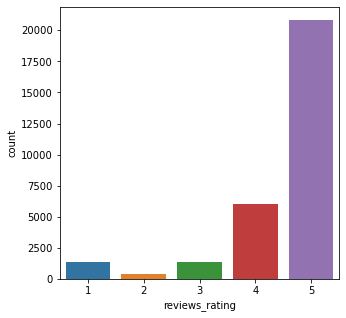

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x='reviews_rating', data=df)
plt.show()

Most of the ratings in dataset consist of good reviews like 5 and 3. It is seen that our target is imbalanced.

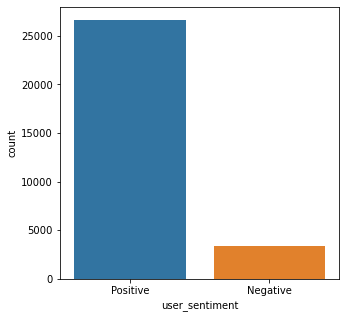

In [177]:
#Map sentiment and rating and see the trend

df['user_sentiment'].value_counts()

plt.figure(figsize=(5,5))
ax = sns.countplot(x='user_sentiment', data=df)

So, we have seen that nearly 89% of the reviews are positive sentiment and only around 11% are negative sentiment

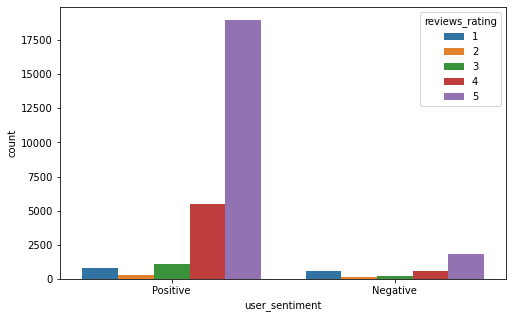

In [178]:
# Lets visualise the rating distribution across the sentiments

plt.figure(figsize=(8,5))
ax = sns.countplot(x='user_sentiment', hue="reviews_rating", data=df)

Its seen that majority of rating 5 is having positive sentiment and whereas the other ratings are more or less proportionately distributed across positive and negative sentiments

In [179]:
# Checking for reviews across different timelines

df['reviews_date'] = pd.to_datetime(df['reviews_date'],errors='coerce').dt.date

In [180]:
df.head(2)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   

                                         name reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)   2012-11-30   
1  Lundberg Organic Cinnamon Toast Rice Cakes   2017-07-09   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0                 NaN                 NaN               5   
1                True                 NaN               5   

                                        reviews_text reviews_title  \
0  i love this album. it's very good. more to the...  Just Awesome   
1  Good flavor. This review was collected as part...          Good   

  reviews_userCity reviews_userProvince reviews_username user_sentiment  
0      Los Angeles                  NaN           joshua       Positive  
1              NaN                  NaN        dorothy w       Positive

In [181]:
# Formatting the reviews_date 
df['reviews_date'] = pd.to_datetime(df.reviews_date, format='%Y-%m-%d')

In [182]:
df['year'] =df['reviews_date'].dt.year

In [183]:
df.head(2)

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   

                                         name reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)   2012-11-30   
1  Lundberg Organic Cinnamon Toast Rice Cakes   2017-07-09   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0                 NaN                 NaN               5   
1                True                 NaN               5   

                                        reviews_text reviews_title  \
0  i love this album. it's very good. more to the...  Just Awesome   
1  Good flavor. This review was collected as part...          Good   

  reviews_userCity reviews_userProvince reviews_username user_sentiment  \
0      Los Angeles                  NaN           joshua       Positive   
1              NaN                  NaN        dorothy w       Positive   

     year  
0  2012.0  
1  2017.0

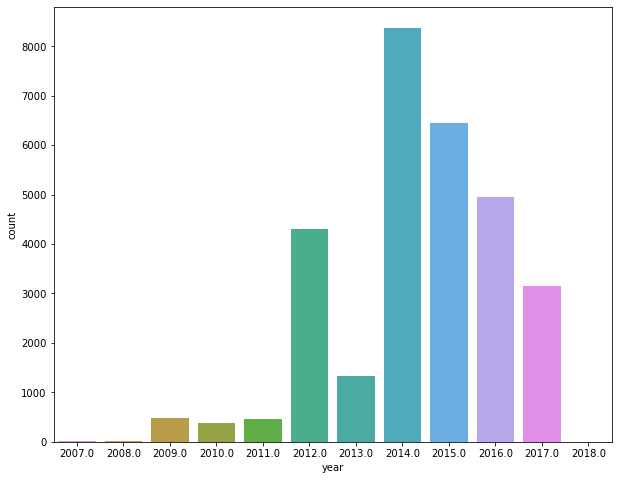

In [184]:
plt.figure(figsize=(10,8))
sns.countplot(x='year', data=df)
plt.show()

From the above it is seen that most of the review data is received from year 2015 to 2016.  

<AxesSubplot:xlabel='year', ylabel='count'>

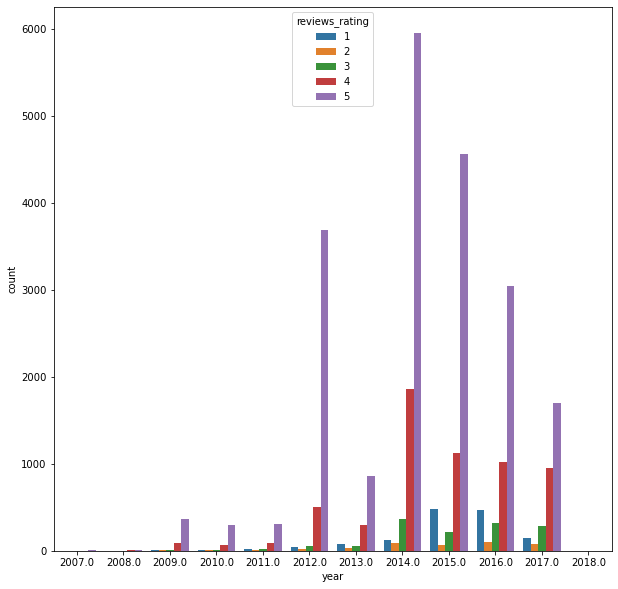

In [186]:
plt.figure(figsize=(10,10))
sns.countplot(x='year', hue='reviews_rating', data=df)

Some of the years like 2012, 2014, 2015, 2016 have really high ratings.

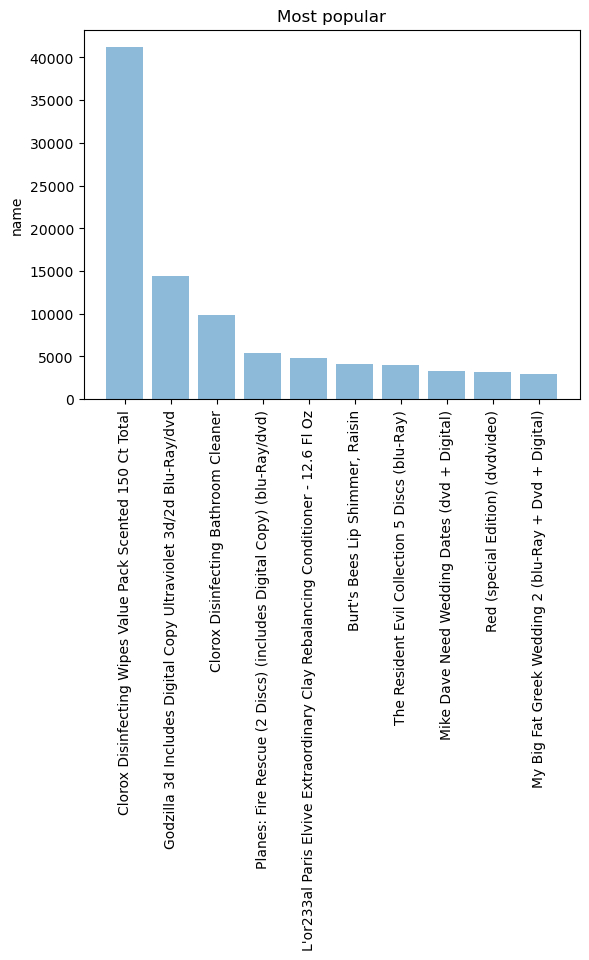

In [187]:
popular = df[['name','reviews_rating']].groupby('name').sum().reset_index()
popular_10 = popular.sort_values('reviews_rating', ascending=False).head(n=10)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = (list(popular_10['name']))
y_pos = np.arange(len(objects))
performance = list(popular_10['reviews_rating'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('name')
plt.title('Most popular')
 
plt.show()

The above shows the top 10 popular products based on review ratings

## Step 4: Pre-Processing of data

In [22]:
reviews.isna().sum()

id                    0
name                  0
reviews_rating        0
reviews_text          0
reviews_title       185
reviews_username      0
user_sentiment        0
dtype: int64

##### Concatenating reviews_text and reviews_title

In [23]:
reviews['reviews_text_title']=reviews['reviews_title'].fillna('') +" "+ reviews['reviews_text']
reviews.head()

id                                        name  \
0  AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
3  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
4  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
5  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   

   reviews_rating                                       reviews_text  \
0               5  i love this album. it's very good. more to the...   
1               5  Good flavor. This review was collected as part...   
3               1  I read through the reviews on here before look...   
4               1  My husband bought this gel for us. The gel cau...   
5               1  My boyfriend and I bought this to spice things...   

  reviews_title reviews_username user_sentiment  \
0  Just Awesome           joshua       Positive   
1          Good        dorothy w       Positive   
3  Disappointed          rebecca       Negative   
4    Irritation        walker557       Negative   
5  Not worth it         samantha       Negative   

                                  reviews_text_title  
0  Just Awesome i love this album. it's very good...  
1  Good Good flavor. This review was collected as...  
3  Disappointed I read through the reviews on her...  
4  Irritation My husband bought this gel for us. ...  
5  Not worth it My boyfriend and I bought this to...

##### Cleaning of reviews_text_title

In [24]:
# function to clean the reviews_text_title

import re
import string

# this function will make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers"

def review_clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [25]:
# Cleaning of reviews_text_title

reviews['reviews_text_title']=reviews['reviews_text_title'].apply(lambda x:review_clean(x))
reviews.head()

id                                        name  \
0  AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
3  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
4  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
5  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   

   reviews_rating                                       reviews_text  \
0               5  i love this album. it's very good. more to the...   
1               5  Good flavor. This review was collected as part...   
3               1  I read through the reviews on here before look...   
4               1  My husband bought this gel for us. The gel cau...   
5               1  My boyfriend and I bought this to spice things...   

  reviews_title reviews_username user_sentiment  \
0  Just Awesome           joshua       Positive   
1          Good        dorothy w       Positive   
3  Disappointed          rebecca       Negative   
4    Irritation        walker557       Negative   
5  Not worth it         samantha       Negative   

                                  reviews_text_title  
0  just awesome i love this album its very good m...  
1  good good flavor this review was collected as ...  
3  disappointed i read through the reviews on her...  
4  irritation my husband bought this gel for us t...  
5  not worth it my boyfriend and i bought this to...

##### With this we have removed all punctuation in our reviews_text_title column

#### Removing stopwords

Since nltk stop words contains words like not,isn't, hasn't, would'nt etc which actually conveys a negative sentiment.
If we remove those, it will end up contradicting the target variable(user_sentiment). Hence, have used customised stop words which doesn't have any negative sentiments.

In [26]:
stopword= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [27]:
# Removing stopwords

reviews['reviews_text_title'] = reviews['reviews_text_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopword)]))
reviews.head()

id                                        name  \
0  AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
3  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
4  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
5  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   

   reviews_rating                                       reviews_text  \
0               5  i love this album. it's very good. more to the...   
1               5  Good flavor. This review was collected as part...   
3               1  I read through the reviews on here before look...   
4               1  My husband bought this gel for us. The gel cau...   
5               1  My boyfriend and I bought this to spice things...   

  reviews_title reviews_username user_sentiment  \
0  Just Awesome           joshua       Positive   
1          Good        dorothy w       Positive   
3  Disappointed          rebecca       Negative   
4    Irritation        walker557       Negative   
5  Not worth it         samantha       Negative   

                                  reviews_text_title  
0  awesome love album good hip hop side current p...  
1   good good flavor review collected part promotion  
3  disappointed read reviews looking buying one c...  
4  irritation husband bought gel us gel caused ir...  
5  not worth boyfriend bought spice things bedroo...

##### With this we have removed all the stopwords from the reviews_text_title

#### Lemmatization

In [28]:
# function to Lemmatize reviews_text_title
def lemmatize(text):
    doc=nlp(text)
    return ' '.join([token.lemma_ for token in doc])

In [29]:
# Lemmatizing reviews_text_title

import en_core_web_sm
nlp = en_core_web_sm.load()

reviews["reviews_text_title"] =  reviews.apply(lambda x: lemmatize(x['reviews_text_title']), axis=1)

In [30]:
reviews.head(5)

id                                        name  \
0  AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
3  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
4  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
5  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   

   reviews_rating                                       reviews_text  \
0               5  i love this album. it's very good. more to the...   
1               5  Good flavor. This review was collected as part...   
3               1  I read through the reviews on here before look...   
4               1  My husband bought this gel for us. The gel cau...   
5               1  My boyfriend and I bought this to spice things...   

  reviews_title reviews_username user_sentiment  \
0  Just Awesome           joshua       Positive   
1          Good        dorothy w       Positive   
3  Disappointed          rebecca       Negative   
4    Irritation        walker557       Negative   
5  Not worth it         samantha       Negative   

                                  reviews_text_title  
0  awesome love album good hip hop side current p...  
1     good good flavor review collect part promotion  
3  disappointed read review look buy one couple l...  
4  irritation husband buy gel we gel cause irrita...  
5  not worth boyfriend buy spice thing bedroom hi...

In [31]:
# Mapping positive sentiment as 1 and negative as 0 

reviews['user_sentiment'] =reviews['user_sentiment'].apply(lambda x: 1 if x=="Positive" else 0) 
reviews.head()

id                                        name  \
0  AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   
3  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
4  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   
5  AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel   

   reviews_rating                                       reviews_text  \
0               5  i love this album. it's very good. more to the...   
1               5  Good flavor. This review was collected as part...   
3               1  I read through the reviews on here before look...   
4               1  My husband bought this gel for us. The gel cau...   
5               1  My boyfriend and I bought this to spice things...   

  reviews_title reviews_username  user_sentiment  \
0  Just Awesome           joshua               1   
1          Good        dorothy w               1   
3  Disappointed          rebecca               0   
4    Irritation        walker557               0   
5  Not worth it         samantha               0   

                                  reviews_text_title  
0  awesome love album good hip hop side current p...  
1     good good flavor review collect part promotion  
3  disappointed read review look buy one couple l...  
4  irritation husband buy gel we gel cause irrita...  
5  not worth boyfriend buy spice thing bedroom hi...

## Step 5: Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [32]:
# Initialise the TfidfVectorizer 

tfidf=TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=stopwords.words('english'), # List of stopwords
                               ngram_range=(1,1),max_df=0.95,min_df=2)

In [33]:
# Creating the Document Term Matrix by transforming the complaints column present in reviews_text_title.

X= tfidf.fit_transform(reviews['reviews_text_title'])

In [34]:
X.shape

(27588, 7759)

In [35]:
# Target variable

y=reviews['user_sentiment']

In [36]:
X.shape,y.shape

((27588, 7759), (27588,))

In [37]:
# Saving the vectorizer so that it can be used later while deploying the model

import pickle

# Save to file in the current working directory
pkl_filename = "Tfidf_vectorizer.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(tfidf, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickled_tfidf_vectorizer = pickle.load(file)

In [38]:
# Checking the proportion of positive ad negative sentiments

reviews['user_sentiment'].value_counts(normalize=True)

1    0.889336
0    0.110664
Name: user_sentiment, dtype: float64

In our dataset, we see around 89% of data are of positive sentiment and only 11% are of negative sentiment. So, this is an imbalanced data. Hence, using SMOTE technique to  balance out the dataset.

In [39]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=100)
X_smt, y_smt = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_smt)}')

Original dataset shape : Counter({1: 24535, 0: 3053})
Resampled dataset shape Counter({1: 24535, 0: 24535})


We can see that the resampled data is evenly distributed across all ratings

#### Train test split

In [40]:
# Splitting the dataset into 70:30 ratio for train and test set respectively.

X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.30, random_state=100)

In [41]:
X_train.shape

(34349, 7759)

In [42]:
X_test.shape

(14721, 7759)

## Step 6: Model Building- Supervised model

##### Logistic regression

In [43]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=400)

# fit the model with data
logreg.fit(X_train,y_train)


LogisticRegression(max_iter=400)

In [44]:
# Making predictions on train and test dataset

lr_train_pred = logreg.predict(X_train)
lr_test_pred = logreg.predict(X_test)

In [45]:
#Metrics Evaluation

from sklearn import metrics

print("Number of Features")
print(X_train.shape[1])
print("Training Accuracy")
print(metrics.accuracy_score(y_train,lr_train_pred))
print("Testing Accuracy")
print(metrics.accuracy_score(y_test,lr_test_pred))

Number of Features
7759
Training Accuracy
0.9111473405339311
Testing Accuracy
0.8949799606005027


In [46]:
# Confusion metrics

from sklearn import metrics
lr_confusion_test = metrics.confusion_matrix(y_test, lr_test_pred)
lr_confusion_test

array([[6893,  465],
       [1081, 6282]], dtype=int64)

In [47]:
print(classification_report(y_test, lr_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7358
           1       0.93      0.85      0.89      7363

    accuracy                           0.89     14721
   macro avg       0.90      0.89      0.89     14721
weighted avg       0.90      0.89      0.89     14721



In [48]:
model_performance=pd.DataFrame()
temp_results = pd.DataFrame({'Model':['Logistic Regression'],
                             'Train Accuracy':[round(metrics.accuracy_score(y_train,lr_train_pred),2)],
                             'Test Accuracy': [round(metrics.accuracy_score(y_test,lr_test_pred),2)],
                             'Precision':[round(metrics.precision_score(y_test, lr_test_pred,average='weighted'),2)],
                             'Recall':[round(metrics.recall_score(y_test, lr_test_pred,average='weighted'),2)],
                             'F1-score':[round(metrics.f1_score(y_test, lr_test_pred,average='weighted'),2)]},index={'1'})
model_results = pd.concat([model_performance, temp_results])
model_results

Model  Train Accuracy  Test Accuracy  Precision  Recall  \
1  Logistic Regression            0.91           0.89        0.9    0.89   

   F1-score  
1      0.89

##### Random Forest

In [49]:
# Using Random Forest

# instantiating the model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# Fitting on train data
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
# Making predictions on train and test dataset

rfc_train_pred = rfc.predict(X_train)
rfc_test_pred = rfc.predict(X_test)

In [51]:
# Metrics Evaluation

print("Number of Features")
print(X_train.shape[1])
print("Training Accuracy")
print(metrics.accuracy_score(y_train,rfc_train_pred))
print("Testing Accuracy")
print(metrics.accuracy_score(y_test,rfc_test_pred))

Number of Features
7759
Training Accuracy
0.9999417741418964
Testing Accuracy
0.9565246926159907


In [52]:
# Confusion Metrics

rf_confusion_test = metrics.confusion_matrix(y_test, rfc_test_pred )
rf_confusion_test

array([[7194,  164],
       [ 476, 6887]], dtype=int64)

In [53]:
print(classification_report(y_test, rfc_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7358
           1       0.98      0.94      0.96      7363

    accuracy                           0.96     14721
   macro avg       0.96      0.96      0.96     14721
weighted avg       0.96      0.96      0.96     14721



In [54]:
# Adding Random Forest details in the dataframe
temp_results = pd.DataFrame({'Model':['Random Forest'],
                             'Train Accuracy':[round(metrics.accuracy_score(y_train,rfc_train_pred),2)],
                             'Test Accuracy': [round(metrics.accuracy_score(y_test,rfc_test_pred),2)],
                             'Precision':[round(metrics.precision_score(y_test, rfc_test_pred,average='weighted'),2)],
                             'Recall':[round(metrics.recall_score(y_test, rfc_test_pred,average='weighted'),2)],
                             'F1-score':[round(metrics.f1_score(y_test, rfc_test_pred,average='weighted'),2)]},index={'2'})
model_results = pd.concat([model_results, temp_results])
model_results
                             

Model  Train Accuracy  Test Accuracy  Precision  Recall  \
1  Logistic Regression            0.91           0.89       0.90    0.89   
2        Random Forest            1.00           0.96       0.96    0.96   

   F1-score  
1      0.89  
2      0.96

##### Naive Bayes

In [55]:
# Using Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [56]:
# Metrics Evaluation

y_pred_class = nb.predict(X_test)
print("Number of Features")
print(X_train.shape[1])
print("Training Accuracy")
print(nb.score(X_train,y_train))
print("Testing Accuracy")
print(nb.score(X_test,y_test))

Number of Features
7759
Training Accuracy
0.8469824449037817
Testing Accuracy
0.830174580531214


In [57]:
# Confusion Metrics

from sklearn import metrics

nb_confusion_test = metrics.confusion_matrix(y_test, y_pred_class )
nb_confusion_test

array([[6124, 1234],
       [1266, 6097]], dtype=int64)

In [58]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7358
           1       0.83      0.83      0.83      7363

    accuracy                           0.83     14721
   macro avg       0.83      0.83      0.83     14721
weighted avg       0.83      0.83      0.83     14721



In [59]:
# Adding Naive Bayes in the dataframe
temp_results = pd.DataFrame({'Model':['Naive Bayes'], 
                             'Train Accuracy':[round(nb.score(X_train,y_train),2)],
                             'Test Accuracy': [round(nb.score(X_test,y_test),2)],
                             'Precision':[round(metrics.precision_score(y_test, y_pred_class,average='weighted'),2)],
                             'Recall':[round(metrics.recall_score(y_test, y_pred_class,average='weighted'),2)],
                             'F1-score':[round(metrics.f1_score(y_test, y_pred_class,average='weighted'),2)]},index={'3'})
                             
model_results = pd.concat([model_results, temp_results])
model_results

Model  Train Accuracy  Test Accuracy  Precision  Recall  \
1  Logistic Regression            0.91           0.89       0.90    0.89   
2        Random Forest            1.00           0.96       0.96    0.96   
3          Naive Bayes            0.85           0.83       0.83    0.83   

   F1-score  
1      0.89  
2      0.96  
3      0.83

##### Xgboost Classifier

In [60]:
# fit model on training data
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

[21:39:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
# Making predictions on train and test dataset

xgb_train_pred = xgb.predict(X_train)
xgb_test_pred = xgb.predict(X_test)

In [62]:
# Metrics Evaluation

print("Number of Features")
print(X_train.shape[1])
print("Training Accuracy")
print(metrics.accuracy_score(y_train,xgb_train_pred))
print("Testing Accuracy")
print(metrics.accuracy_score(y_test,xgb_test_pred))

Number of Features
7759
Training Accuracy
0.9429386590584878
Testing Accuracy
0.9067998097955302


In [63]:
# Confusion Metrics

xgb_confusion_test = metrics.confusion_matrix(y_test, xgb_test_pred )
xgb_confusion_test

array([[6693,  665],
       [ 707, 6656]], dtype=int64)

In [64]:
print(classification_report(y_test, xgb_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      7358
           1       0.91      0.90      0.91      7363

    accuracy                           0.91     14721
   macro avg       0.91      0.91      0.91     14721
weighted avg       0.91      0.91      0.91     14721



In [65]:
# Adding XGboost classifier in the dataframe
temp_results = pd.DataFrame({'Model':['XGBoost Classifier'], 
                             'Train Accuracy':[round(metrics.accuracy_score(y_train,xgb_train_pred),2)],
                             'Test Accuracy': [round(metrics.accuracy_score(y_test,xgb_test_pred),2)],
                             'Precision':[round(metrics.precision_score(y_test, xgb_test_pred,average='weighted'),2)],
                             'Recall':[round(metrics.recall_score(y_test, xgb_test_pred,average='weighted'),2)],
                             'F1-score':[round(metrics.f1_score(y_test, xgb_test_pred,average='weighted'),2)]},index={'4'})
                             
model_results = pd.concat([model_results, temp_results])
model_results

Model  Train Accuracy  Test Accuracy  Precision  Recall  \
1  Logistic Regression            0.91           0.89       0.90    0.89   
2        Random Forest            1.00           0.96       0.96    0.96   
3          Naive Bayes            0.85           0.83       0.83    0.83   
4   XGBoost Classifier            0.94           0.91       0.91    0.91   

   F1-score  
1      0.89  
2      0.96  
3      0.83  
4      0.91

From above we see that Random Forest gives the maximum test accuracy and precison and recall values are also higher than the other algorithms. However, in this case, since Logistic Regression has also provided quite good accuracy results and recall and precision values are equally good, and also the difference between train and test accuracy is the lowest, we would prefer to use Logictic Regression. Moreover, Logistic Regression is comparatively faster than Random Forest and XGboost.

Lets use hyperparameters for Logistic regression using Random Search if it can be improved further

In [66]:
# Load libraries

from scipy.stats import uniform
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV

##### Create Hyperparameter Search Space

In [67]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [68]:
# Create randomized search 5-fold cross validation and 100 iterations

clf = RandomizedSearchCV(logreg, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [69]:
# Fit randomized search
best_model = clf.fit(X_train, y_train)

In [70]:
best_model_train_pred=best_model.predict(X_train)
best_model_test_pred=best_model.predict(X_test)

In [71]:
# Metrics Evaluation

print("Number of Features")
print(X_train.shape[1])
print("Training Accuracy")
print(metrics.accuracy_score(y_train,best_model_train_pred))
print("Testing Accuracy")
print(metrics.accuracy_score(y_test,best_model_test_pred))

Number of Features
7759
Training Accuracy
0.9344959096334682
Testing Accuracy
0.9115549215406562


In [72]:
# Confusion Metrics

best_model_confusion_test = metrics.confusion_matrix(y_test, best_model_test_pred)
best_model_confusion_test

array([[7003,  355],
       [ 947, 6416]], dtype=int64)

In [73]:
print(classification_report(y_test, best_model_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7358
           1       0.95      0.87      0.91      7363

    accuracy                           0.91     14721
   macro avg       0.91      0.91      0.91     14721
weighted avg       0.91      0.91      0.91     14721



In [74]:
temp_results = pd.DataFrame({'Model':['Logistic Regression after hypertuning'], 
                             'Train Accuracy':[round(metrics.accuracy_score(y_train,best_model_train_pred),2)],
                             'Test Accuracy': [round(metrics.accuracy_score(y_test,best_model_test_pred),2)],
                             'Precision':[round(metrics.precision_score(y_test, best_model_test_pred,average='weighted'),2)],
                             'Recall':[round(metrics.recall_score(y_test, best_model_test_pred,average='weighted'),2)],
                             'F1-score':[round(metrics.f1_score(y_test, best_model_test_pred,average='weighted'),2)]},index={'5'})
                             
model_results = pd.concat([model_results, temp_results])
model_results

Model  Train Accuracy  Test Accuracy  \
1                    Logistic Regression            0.91           0.89   
2                          Random Forest            1.00           0.96   
3                            Naive Bayes            0.85           0.83   
4                     XGBoost Classifier            0.94           0.91   
5  Logistic Regression after hypertuning            0.93           0.91   

   Precision  Recall  F1-score  
1       0.90    0.89      0.89  
2       0.96    0.96      0.96  
3       0.83    0.83      0.83  
4       0.91    0.91      0.91  
5       0.91    0.91      0.91

After using hyper tuning of Logictic regression, since we see better results of train, test accuracy and Precision and Recall, we would use hypertuned Logictic regression for our analysis.

In [75]:
# Saving the model as it will be used later while deploying
import pickle

# Save to file in the current working directory
pkl_filename = "Logistic_Regression_final_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pkl_model = pickle.load(file)

## Step 7: PRODUCT RECOMMENDATION

In [76]:
# Copying the cleaned reviews dataframe to a new one df1

df1=reviews.copy()
df1.head(2)

id                                        name  \
0  AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   

   reviews_rating                                       reviews_text  \
0               5  i love this album. it's very good. more to the...   
1               5  Good flavor. This review was collected as part...   

  reviews_title reviews_username  user_sentiment  \
0  Just Awesome           joshua               1   
1          Good        dorothy w               1   

                                  reviews_text_title  
0  awesome love album good hip hop side current p...  
1     good good flavor review collect part promotion

In [77]:
df1.shape

(27588, 8)

In [78]:
# Checking for duplicates if any
df1.duplicated().any()

False

#### Dividing the dataset into train and test

In [79]:
# Test and Train split of the dataset.

from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.30, random_state=100)

In [80]:
print(train.shape)
print(test.shape)

(19311, 8)
(8277, 8)


In [81]:
# Checking the total no users 

len(train.name.unique())

253

In [82]:
# Pivot the train ratings' dataset into matrix format in which columns are products and the rows are user IDs.

df_pivot=train.pivot(index='reviews_username',columns='name', values='reviews_rating').fillna(0)
print(df_pivot.shape)
df_pivot.tail(3)

(17859, 253)


name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
zxjki                                                           0.0               
zzdiane                                                         0.0               
zzz1127                                                         0.0               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
zxjki                                             0.0   
zzdiane                                           0.0   
zzz1127                                           0.0   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
zxjki                                                           0.0                   
zzdiane                                                         0.0                   
zzz1127                                                         0.0                   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
zxjki                                                0.0   
zzdiane                                              0.0   
zzz1127                                              0.0   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
zxjki                                                           0.0   
zzdiane                                                         0.0   
zzz1127                                                         0.0   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
zxjki                                        0.0   
zzdiane                                      0.0   
zzz1127                                      0.0   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
zxjki                                                           0.0             
zzdiane                                                         0.0             
zzz1127                                                         0.0             

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_username                                                       
zxjki                                                           0.0    
zzdiane                                                         0.0    
zzz1127                                                         0.0    

name              Alex Cross (dvdvideo)  \
reviews_username                          
zxjki                               0.0   
zzdiane                             0.0   
zzz1127                             0.0   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
zxjki                                                0.0   
zzdiane                                              0.0   
zzz1127                                              0.0   

name              Ambi Complexion Cleansing Bar  \
reviews_username                                  
zxjki                                       0.0   
zzdiane                                     0.0   
zzz1127                                     0.0   

name              Annie's Homegrown Deluxe Elbows & Four Cheese Sauce  \
reviews_username                                                        
zxjki                                                           0.0     
zzdiane                                                         0.0     
zzz1127                                                         0.0     

name              Annie's Homegrown Gl

### Creating dummy train & dummy test dataset
These dataset will be used for prediction

Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction in dummy train dataset.

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [83]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [84]:
# The products not rated by user is marked as 1 for prediction.

dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [85]:
# Convert the dummy train dataset into matrix format.

dummy_train = dummy_train.pivot(index='reviews_username',columns='name', values='reviews_rating').fillna(1)
dummy_train.head(2)


name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                         1.0               
01impala                                                        1.0               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           1.0   
01impala                                          1.0   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                         1.0                   
01impala                                                        1.0                   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                              1.0   
01impala                                             1.0   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00sab00                                                         1.0   
01impala                                                        1.0   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00sab00                                      1.0   
01impala                                     1.0   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00sab00                                                         1.0             
01impala                                                        1.0             

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_username                                                       
00sab00                                                         1.0    
01impala                                                        1.0    

name              Alex Cross (dvdvideo)  \
reviews_username                          
00sab00                             1.0   
01impala                            1.0   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00sab00                                              1.0   
01impala                                             1.0   

name              Ambi Complexion Cleansing Bar  \
reviews_username                                  
00sab00                                     1.0   
01impala                                    1.0   

name              Annie's Homegrown Deluxe Elbows & Four Cheese Sauce  \
reviews_username                                                        
00sab00                                                         1.0     
01impala                                                        1.0     

name              Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars  \
reviews_username                                                                     
00sab00                                                         1.0                  
01impala                                                        1.0                  

name              Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular  \
reviews_username                                                            
00sab00                                                         1.0         
01impala                                                        1.0         

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
00sab00                                              1

**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.


#### User Similarity Matrix

##### Using Cosine Similarity

In [86]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)


[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


In [87]:
user_correlation.shape

(17859, 17859)

#### Using adjusted Cosine

#### Here, we are not removing the NaN values and calculating the mean only for the products rated by the user

In [88]:
# Create a user-product matrix.
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

In [89]:
df_pivot.head(2)

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                         NaN               
01impala                                                        NaN               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           NaN   
01impala                                          NaN   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                         NaN                   
01impala                                                        NaN                   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                              NaN   
01impala                                             NaN   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00sab00                                                         NaN   
01impala                                                        NaN   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00sab00                                      NaN   
01impala                                     NaN   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00sab00                                                         NaN             
01impala                                                        NaN             

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_username                                                       
00sab00                                                         NaN    
01impala                                                        NaN    

name              Alex Cross (dvdvideo)  \
reviews_username                          
00sab00                             NaN   
01impala                            NaN   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00sab00                                              NaN   
01impala                                             NaN   

name              Ambi Complexion Cleansing Bar  \
reviews_username                                  
00sab00                                     NaN   
01impala                                    NaN   

name              Annie's Homegrown Deluxe Elbows & Four Cheese Sauce  \
reviews_username                                                        
00sab00                                                         NaN     
01impala                                                        NaN     

name              Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars  \
reviews_username                                                                     
00sab00                                                         NaN                  
01impala                                                        NaN                  

name              Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular  \
reviews_username                                                            
00sab00                                                         NaN         
01impala                                                        NaN         

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
00sab00                                              N

#### Normalising the rating of the products for each user around 0 mean

In [90]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [91]:
df_subtracted.head(2)

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                         NaN               
01impala                                                        NaN               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           NaN   
01impala                                          NaN   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                         NaN                   
01impala                                                        NaN                   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                              NaN   
01impala                                             NaN   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00sab00                                                         NaN   
01impala                                                        NaN   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00sab00                                      NaN   
01impala                                     NaN   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00sab00                                                         NaN             
01impala                                                        NaN             

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_username                                                       
00sab00                                                         NaN    
01impala                                                        NaN    

name              Alex Cross (dvdvideo)  \
reviews_username                          
00sab00                             NaN   
01impala                            NaN   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00sab00                                              NaN   
01impala                                             NaN   

name              Ambi Complexion Cleansing Bar  \
reviews_username                                  
00sab00                                     NaN   
01impala                                    NaN   

name              Annie's Homegrown Deluxe Elbows & Four Cheese Sauce  \
reviews_username                                                        
00sab00                                                         NaN     
01impala                                                        NaN     

name              Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars  \
reviews_username                                                                     
00sab00                                                         NaN                  
01impala                                                        NaN                  

name              Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular  \
reviews_username                                                            
00sab00                                                         NaN         
01impala                                                        NaN         

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
00sab00                                              N

#### Finding cosine similarity

In [92]:
from sklearn.metrics.pairwise import pairwise_distances

In [93]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Prediction - User User

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [94]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Rating predicted by the user (for rated products as well as not rated products) is the weighted sum of correlation with the product rating (as present in the provided dataset). 

In [95]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
user_predicted_ratings.shape

(17859, 253)

Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero.

In [97]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                         0.0               
01impala                                                        0.0               
02dakota                                                        0.0               
02deuce                                                         0.0               
0325home                                                        0.0               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           0.0   
01impala                                          0.0   
02dakota                                          0.0   
02deuce                                           0.0   
0325home                                          0.0   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                         0.0                   
01impala                                                        0.0                   
02dakota                                                        0.0                   
02deuce                                                         0.0                   
0325home                                                        0.0                   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                              0.0   
01impala                                             0.0   
02dakota                                             0.0   
02deuce                                              0.0   
0325home                                             0.0   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00sab00                                                         0.0   
01impala                                                        0.0   
02dakota                                                        0.0   
02deuce                                                         0.0   
0325home                                                        0.0   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00sab00                                      0.0   
01impala                                     0.0   
02dakota                                     0.0   
02deuce                                      0.0   
0325home                                     0.0   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00sab00                                                         0.0             
01impala                                                        0.0             
02dakota                                                        0.0             
02deuce                                                         0.0             
0325home                                                        0.0             

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_username                                                       
00sab00                                                         0.0    
01impala                                                        0.0    
02dakota                                                        0.0    
02deuce                                                         0.0    
0325home                                                        0.0    

name              Alex Cross (dvdvideo)  \
reviews_

#### Finding the top 5 recommendation for the *user*

In [98]:
# Take the reviews_username as input.

user_input = str(input("Enter your user name"))
print(user_input)

Enter your user namejoshua
joshua


In [99]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd    12.792076
Alex Cross (dvdvideo)                                               3.333333
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)               3.333333
Chester's Cheese Flavored Puffcorn Snacks                           3.077287
Clorox Disinfecting Bathroom Cleaner                                3.077287
Name: joshua, dtype: float64

In [100]:
# Mapping the product with the id

id_name=df1[['id','name']]
id_name = pd.DataFrame.drop_duplicates(id_name)
id_name.head()

id                                        name
0   AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)
1   AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes
3   AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel
30  AV1d76w7vKc47QAVhCqn        J.R. Watkins Hand Cream, Lemon Cream
36  AV1h6gSl-jtxr-f31p40               Ambi Complexion Cleansing Bar

In [101]:
# Merging unique product review id (id) with mapping dataframe 

d = pd.merge(d,id_name, left_on='name', right_on='name', how = 'left')
d

name     joshua  \
0  Godzilla 3d Includes Digital Copy Ultraviolet ...  12.792076   
1                              Alex Cross (dvdvideo)   3.333333   
2  Windex Original Glass Cleaner Refill 67.6oz (2...   3.333333   
3          Chester's Cheese Flavored Puffcorn Snacks   3.077287   
4               Clorox Disinfecting Bathroom Cleaner   3.077287   

                     id  
0  AVpfPaoqLJeJML435Xk9  
1  AVpfOIrkilAPnD_xXgDG  
2  AV1YGDqsGV-KLJ3adc-O  
3  AVpf5olc1cnluZ0-tPrO  
4  AVpfJP1C1cnluZ0-e3Xy

#### Evaluation - User User

Evaluation will be same as we have seen above for the prediction. The only difference being, here we will evaluate for the products already rated by the user insead of predicting it for the product not rated by the user.

In [102]:
# Finding the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1077, 8)

In [103]:
common.head()

id  \
5171   AVpf0eb2LJeJML43EVSt   
2962   AVpe59io1cnluZ0-ZgDU   
19196  AVpfJP1C1cnluZ0-e3Xy   
14924  AVpf3VOfilAPnD_xjpun   
22025  AVpfnRuSilAPnD_xfB8l   

                                                    name  reviews_rating  \
5171      The Resident Evil Collection 5 Discs (blu-Ray)               5   
2962   My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...               5   
19196               Clorox Disinfecting Bathroom Cleaner               5   
14924  Clorox Disinfecting Wipes Value Pack Scented 1...               5   
22025           Yes To Grapefruit Rejuvenating Body Wash               2   

                                            reviews_text  \
5171   Great price and of course love the movies...no...   
2962   This was better than the first. We laughed so ...   
19196  I am a very busy person and these wipes make c...   
14924  My family loves to use them. They clean up fas...   
22025  I can tell by looking at the container that th...   

                    reviews_title reviews_username  user_sentiment  \
5171                  Great price         happymom               1   
2962                        Funny          sj95123               1   
19196          I LOVE THIS STUFF!          chasity               1   
14924                Clorox Wipes            richy               1   
22025  This bottle will not work.             dora               1   

                                      reviews_text_title  
5171   great price great price course love moviesnow ...  
2962               funny well first laugh hard fun night  
19196  love stuff busy person wipe make clean fast ea...  
14924  clorox wipe family love use clean fast great j...  
22025  bottle will not work tell look container will ...

In [104]:
# converting into the user-product matrix.

common_user_based_matrix = common.pivot(index='reviews_username',columns='name',values='reviews_rating')
common_user_based_matrix.head()

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           NaN   
1234                                              NaN   
1943                                              NaN   
50cal                                             NaN   
abby                                              NaN   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00sab00                                                     NaN   
1234                                                        NaN   
1943                                                        NaN   
50cal                                                       NaN   
abby                                                        NaN   

name              Alex Cross (dvdvideo)  \
reviews_username                          
00sab00                             NaN   
1234                                NaN   
1943                                NaN   
50cal                               NaN   
abby                                NaN   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00sab00                                              NaN   
1234                                                 NaN   
1943                                                 NaN   
50cal                                                NaN   
abby                                                 NaN   

name              Ambi Complexion Cleansing Bar  \
reviews_username                                  
00sab00                                     NaN   
1234                                        NaN   
1943                                        NaN   
50cal                                       NaN   
abby                                        NaN   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
00sab00                                              NaN   
1234                                                 NaN   
1943                                                 NaN   
50cal                                                NaN   
abby                                                 NaN   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
00sab00                                                  NaN   
1234                                                     NaN   
1943                                                     NaN   
50cal                                                    NaN   
abby                                                     NaN   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
00sab00                                                         NaN                                    
1234                                                            NaN                                    
1943                                                            NaN                                    
50cal                                                           NaN                                    
abby                                                            NaN                                    

name              Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter  \
reviews_username                                                                                    
00sab00                                                         NaN                                 
1234                                                            NaN                                 
1943                                          

In [105]:
# Convert the user_correlation matrix into dataframe.

user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

0      1      2      3      4      5      6      7      8      9      \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   10     11     12     13     14     15     16     17     18     19     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   20     21     22     23     24     25     26     27     28     29     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   30     31     32     33     34     35     36     37     38     39     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   40     41     42     43     44     45     46     47     48     49     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   50     51     52     53     54     55     56     57     58     59     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   60     61     62     63     64     65     66     67     68     69     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   70     71     72     73     74     75     76     77     78     79     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   80     81     82     83     84     85     86     87     88     89     \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0

In [106]:
df_subtracted.head(1)

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                         NaN               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           NaN   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                         NaN                   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                              NaN   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00sab00                                                         NaN   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00sab00                                      NaN   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00sab00                                                         NaN             

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_username                                                       
00sab00                                                         NaN    

name              Alex Cross (dvdvideo)  \
reviews_username                          
00sab00                             NaN   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00sab00                                              NaN   

name              Ambi Complexion Cleansing Bar  \
reviews_username                                  
00sab00                                     NaN   

name              Annie's Homegrown Deluxe Elbows & Four Cheese Sauce  \
reviews_username                                                        
00sab00                                                         NaN     

name              Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars  \
reviews_username                                                                     
00sab00                                                         NaN                  

name              Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular  \
reviews_username                                                            
00sab00                                                         NaN         

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
00sab00                                              NaN   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
00sab00                                                  NaN   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
00sab00                                                         NaN                                    

name              Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack)  \
reviews_username                                                                                                       
00sab00                                                         NaN                                                    

name              Avery174 Ready Index Contemporary Table Of Contents Divider, 

In [107]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

0      1      2      3      4      5      6      7      \
reviews_username                                                           
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                  8      9      10     11     12     13     14     15     \
reviews_username                                                           
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                  16     17     18     19     20     21     22     23     \
reviews_username                                                           
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                  24     25     26     27     28     29     30     31     \
reviews_username                                                           
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                  32     33     34     35     36     37     38     39     \
reviews_username                                                           
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                  40     41     42     43     44     45     46     47     \
reviews_username                                                           
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                  48     49     50     51     52     53     54     55     \
reviews_username                                                           
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02dakota            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
0325home            0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                  56     57     58     59     60     61     62     63     \
reviews_username                                                           
00sab00             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    0.0    0.0    0.0    0.0    0.0 

In [108]:
common.head(1)

id                                            name  \
5171  AVpf0eb2LJeJML43EVSt  The Resident Evil Collection 5 Discs (blu-Ray)   

      reviews_rating                                       reviews_text  \
5171               5  Great price and of course love the movies...no...   

     reviews_title reviews_username  user_sentiment  \
5171   Great price         happymom               1   

                                     reviews_text_title  
5171  great price great price course love moviesnow ...

In [109]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [110]:
user_correlation_df_1.shape

(892, 17859)

In [111]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [112]:
user_correlation_df_3 = user_correlation_df_2.T

In [113]:
print(user_correlation_df_3.shape)
user_correlation_df_3.head()

(892, 892)


00sab00  1234  1943  50cal  abby  abismomy  ac94  \
reviews_username                                                     
00sab00               0.0   0.0   0.0    0.0   0.0       0.0   0.0   
1234                  0.0   0.0   0.0    0.0   0.0       0.0   0.0   
1943                  0.0   0.0   0.0    0.0   0.0       0.0   0.0   
50cal                 0.0   0.0   0.0    0.0   0.0       0.0   0.0   
abby                  0.0   0.0   0.0    0.0   0.0       0.0   0.0   

                  acjuarez08  adam  adelynsmom  adrienne  aep1010  aj1135  \
reviews_username                                                            
00sab00                  0.0   0.0         0.0       0.0      0.0     0.0   
1234                     0.0   0.0         0.0       0.0      0.0     0.0   
1943                     0.0   0.0         0.0       0.0      0.0     0.0   
50cal                    0.0   0.0         0.0       0.0      0.0     0.0   
abby                     0.0   0.0         0.0       0.0      0.0     0.0   

                  ajay  ajune  alarm  alex  alexa86  alexis  alice  amanda  \
reviews_username                                                             
00sab00            0.0    0.0    0.0   0.0      0.0     0.0    0.0     0.0   
1234               0.0    0.0    0.0   0.0      0.0     0.0    0.0     0.0   
1943               0.0    0.0    0.0   0.0      0.0     0.0    0.0     0.0   
50cal              0.0    0.0    0.0   0.0      0.0     0.0    0.0     0.0   
abby               0.0    0.0    0.0   0.0      0.0     0.0    0.0     0.0   

                  amanda13  amazing  amber  amlyke  ammcam  ammi  amy1  amy75  \
reviews_username                                                                
00sab00                0.0      0.0    0.0     0.0     0.0   0.0   0.0    0.0   
1234                   0.0      0.0    0.0     0.0     0.0   0.0   0.0    0.0   
1943                   0.0      0.0    0.0     0.0     0.0   0.0   0.0    0.0   
50cal                  0.0      0.0    0.0     0.0     0.0   0.0   0.0    0.0   
abby                   0.0      0.0    0.0     0.0     0.0   0.0   0.0    0.0   

                  amyw333  anas  andrea  andreafl  andy  ang32  angc  angel  \
reviews_username                                                              
00sab00               0.0   0.0     0.0       0.0   0.0    0.0   0.0    0.0   
1234                  0.0   0.0     0.0       0.0   0.0    0.0   0.0    0.0   
1943                  0.0   0.0     0.0       0.0   0.0    0.0   0.0    0.0   
50cal                 0.0   0.0     0.0       0.0   0.0    0.0   0.0    0.0   
abby                  0.0   0.0     0.0       0.0   0.0    0.0   0.0    0.0   

                  angie  angie2  animallover  anita  anna  anne  annie  april  \
reviews_username                                                                
00sab00             0.0     0.0          0.0    0.0   0.0   0.0    0.0    0.0   
1234                0.0     0.0          0.0    0.0   0.0   0.0    0.0    0.0   
1943                0.0     0.0          0.0    0.0   0.0   0.0    0.0    0.0   
50cal               0.0     0.0          0.0    0.0   0.0   0.0    0.0    0.0   
abby                0.0     0.0          0.0    0.0   0.0   0.0    0.0    0.0   

                  aprilg87  arcticfox  aria  arlingtondonna  arob  ash4  \
reviews_username                                                          
00sab00                0.0        0.0   0.0             0.0   0.0   0.0   
1234                   0.0        0.0   0.0             0.0   0.0   0.0   
1943                   0.0        0.0   0.0             0.0   0.0   0.0   
50cal                  0.0        0.0   0.0             0.0   0.0   0.0   
abby                   0.0        0.0   0.0             0.0   0.0   0.0   

                  ashley06  audra  awesome  ayterrazas  babs  backspace831  \
reviews_username                                                             
00sab00                0.0    0.0      0.0         0.0   0.0        

In [114]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [115]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot(index='reviews_username',columns='name',values='reviews_rating').fillna(0)
print(dummy_test.shape)

(892, 119)


In [116]:
print(common_user_based_matrix.shape)
common_user_based_matrix.head()

(892, 119)


name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           NaN   
1234                                              NaN   
1943                                              NaN   
50cal                                             NaN   
abby                                              NaN   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00sab00                                                     NaN   
1234                                                        NaN   
1943                                                        NaN   
50cal                                                       NaN   
abby                                                        NaN   

name              Alex Cross (dvdvideo)  \
reviews_username                          
00sab00                             NaN   
1234                                NaN   
1943                                NaN   
50cal                               NaN   
abby                                NaN   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00sab00                                              NaN   
1234                                                 NaN   
1943                                                 NaN   
50cal                                                NaN   
abby                                                 NaN   

name              Ambi Complexion Cleansing Bar  \
reviews_username                                  
00sab00                                     NaN   
1234                                        NaN   
1943                                        NaN   
50cal                                       NaN   
abby                                        NaN   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
00sab00                                              NaN   
1234                                                 NaN   
1943                                                 NaN   
50cal                                                NaN   
abby                                                 NaN   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
00sab00                                                  NaN   
1234                                                     NaN   
1943                                                     NaN   
50cal                                                    NaN   
abby                                                     NaN   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
00sab00                                                         NaN                                    
1234                                                            NaN                                    
1943                                                            NaN                                    
50cal                                                           NaN                                    
abby                                                            NaN                                    

name              Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter  \
reviews_username                                                                                    
00sab00                                                         NaN                                 
1234                                                            NaN                                 
1943                                          

In [117]:
print(dummy_test.shape)
dummy_test.head()

(892, 119)


name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           0.0   
1234                                              0.0   
1943                                              0.0   
50cal                                             0.0   
abby                                              0.0   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00sab00                                                     0.0   
1234                                                        0.0   
1943                                                        0.0   
50cal                                                       0.0   
abby                                                        0.0   

name              Alex Cross (dvdvideo)  \
reviews_username                          
00sab00                             0.0   
1234                                0.0   
1943                                0.0   
50cal                               0.0   
abby                                0.0   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00sab00                                              0.0   
1234                                                 0.0   
1943                                                 0.0   
50cal                                                0.0   
abby                                                 0.0   

name              Ambi Complexion Cleansing Bar  \
reviews_username                                  
00sab00                                     0.0   
1234                                        0.0   
1943                                        0.0   
50cal                                       0.0   
abby                                        0.0   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
00sab00                                              0.0   
1234                                                 0.0   
1943                                                 0.0   
50cal                                                0.0   
abby                                                 0.0   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
00sab00                                                  0.0   
1234                                                     0.0   
1943                                                     0.0   
50cal                                                    0.0   
abby                                                     0.0   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
00sab00                                                         0.0                                    
1234                                                            0.0                                    
1943                                                            0.0                                    
50cal                                                           0.0                                    
abby                                                            0.0                                    

name              Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter  \
reviews_username                                                                                    
00sab00                                                         0.0                                 
1234                                                            0.0                                 
1943                                          

In [118]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
common_user_predicted_ratings.head()

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           0.0   
1234                                              0.0   
1943                                              0.0   
50cal                                             0.0   
abby                                              0.0   

name              42 Dual Drop Leaf Table with 2 Madrid Chairs"  \
reviews_username                                                  
00sab00                                                     0.0   
1234                                                        0.0   
1943                                                        0.0   
50cal                                                       0.0   
abby                                                        0.0   

name              Alex Cross (dvdvideo)  \
reviews_username                          
00sab00                             0.0   
1234                                0.0   
1943                                0.0   
50cal                               0.0   
abby                                0.0   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00sab00                                              0.0   
1234                                                 0.0   
1943                                                 0.0   
50cal                                                0.0   
abby                                                 0.0   

name              Ambi Complexion Cleansing Bar  \
reviews_username                                  
00sab00                                     0.0   
1234                                        0.0   
1943                                        0.0   
50cal                                       0.0   
abby                                        0.0   

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
00sab00                                              0.0   
1234                                                 0.0   
1943                                                 0.0   
50cal                                                0.0   
abby                                                 0.0   

name              Australian Gold Exotic Blend Lotion, SPF 4  \
reviews_username                                               
00sab00                                                  0.0   
1234                                                     0.0   
1943                                                     0.0   
50cal                                                    0.0   
abby                                                     0.0   

name              Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz  \
reviews_username                                                                                       
00sab00                                                         0.0                                    
1234                                                            0.0                                    
1943                                                            0.0                                    
50cal                                                           0.0                                    
abby                                                            0.0                                    

name              Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter  \
reviews_username                                                                                    
00sab00                                                         0.0                                 
1234                                                            0.0                                 
1943                                          

Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range

In [119]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))
print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [120]:
common_ = common.pivot(index='reviews_username',columns='name',values='reviews_rating')

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.5496193263004665


**RMSE for User-User based recommendation is 2.55**

### Item Based Collaborative Filter recommendation

Taking the transpose of the rating matrix to normalize the rating around the mean for different products ID. In the user based similarity, we had taken mean for each user instead of each product.

In [121]:
df2=reviews.copy()

In [122]:
# Test and Train split of the dataset.

from sklearn.model_selection import train_test_split
train, test = train_test_split(df2, test_size=0.30, random_state=100)

In [123]:
print(train.shape)
print(test.shape)

(19311, 8)
(8277, 8)


In [124]:
df_pivot_item = train.pivot(
   index='reviews_username',
    columns='name',
    values='reviews_rating'
).T


df_pivot_item.head()

reviews_username                                    00sab00  01impala  \
name                                                                    
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...      NaN       NaN   
100:Complete First Season (blu-Ray)                     NaN       NaN   
2017-2018 Brownline174 Duraflex 14-Month Planne...      NaN       NaN   
2x Ultra Era with Oxi Booster, 50fl oz                  NaN       NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker       NaN       NaN   

reviews_username                                    02dakota  02deuce  \
name                                                                    
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN      NaN   
100:Complete First Season (blu-Ray)                      NaN      NaN   
2017-2018 Brownline174 Duraflex 14-Month Planne...       NaN      NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN      NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN      NaN   

reviews_username                                    0325home  08dallas  \
name                                                                     
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN       NaN   
100:Complete First Season (blu-Ray)                      NaN       5.0   
2017-2018 Brownline174 Duraflex 14-Month Planne...       NaN       NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN       NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN       NaN   

reviews_username                                    09mommy11  1085  11677j  \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...        NaN   NaN     NaN   
100:Complete First Season (blu-Ray)                       NaN   NaN     NaN   
2017-2018 Brownline174 Duraflex 14-Month Planne...        NaN   NaN     NaN   
2x Ultra Era with Oxi Booster, 50fl oz                    NaN   NaN     NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker         NaN   NaN     NaN   

reviews_username                                    1234  1234561  1234asdf  \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...   NaN      NaN       NaN   
100:Complete First Season (blu-Ray)                  NaN      NaN       NaN   
2017-2018 Brownline174 Duraflex 14-Month Planne...   NaN      NaN       NaN   
2x Ultra Era with Oxi Booster, 50fl oz               NaN      NaN       NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker    NaN      NaN       NaN   

reviews_username                                    123cat123  123charlie  \
name                                                                        
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...        NaN         NaN   
100:Complete First Season (blu-Ray)                       NaN         NaN   
2017-2018 Brownline174 Duraflex 14-Month Planne...        NaN         NaN   
2x Ultra Era with Oxi Booster, 50fl oz                    NaN         NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker         NaN         NaN   

reviews_username                                    123numbers  123rs  123too  \
name                                                                            
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...         NaN    NaN     NaN   
100:Complete First Season (blu-Ray)                        NaN    NaN     NaN   
2017-2018 Brownline174 Duraflex 14-Month Planne...         NaN    NaN     NaN   
2x Ultra Era with Oxi Booster, 50fl oz                     NaN    NaN     NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker          NaN    NaN     NaN   

reviews_username                                    127726  12cass12  12gage  \
name                                                                           
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...     NaN       NaN     NaN   
1

In [125]:
from sklearn.metrics.pairwise import pairwise_distances

# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_pivot_item.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Normalising the rating for each products for using the Adujsted Cosine

In [126]:
mean = np.nanmean(df_pivot_item, axis=1)
df_subtracted_item = (df_pivot_item.T-mean).T

In [127]:
df_subtracted_item.head()

reviews_username                                    00sab00  01impala  \
name                                                                    
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...      NaN       NaN   
100:Complete First Season (blu-Ray)                     NaN       NaN   
2017-2018 Brownline174 Duraflex 14-Month Planne...      NaN       NaN   
2x Ultra Era with Oxi Booster, 50fl oz                  NaN       NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker       NaN       NaN   

reviews_username                                    02dakota  02deuce  \
name                                                                    
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN      NaN   
100:Complete First Season (blu-Ray)                      NaN      NaN   
2017-2018 Brownline174 Duraflex 14-Month Planne...       NaN      NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN      NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN      NaN   

reviews_username                                    0325home  08dallas  \
name                                                                     
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...       NaN       NaN   
100:Complete First Season (blu-Ray)                      NaN  0.287234   
2017-2018 Brownline174 Duraflex 14-Month Planne...       NaN       NaN   
2x Ultra Era with Oxi Booster, 50fl oz                   NaN       NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker        NaN       NaN   

reviews_username                                    09mommy11  1085  11677j  \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...        NaN   NaN     NaN   
100:Complete First Season (blu-Ray)                       NaN   NaN     NaN   
2017-2018 Brownline174 Duraflex 14-Month Planne...        NaN   NaN     NaN   
2x Ultra Era with Oxi Booster, 50fl oz                    NaN   NaN     NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker         NaN   NaN     NaN   

reviews_username                                    1234  1234561  1234asdf  \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...   NaN      NaN       NaN   
100:Complete First Season (blu-Ray)                  NaN      NaN       NaN   
2017-2018 Brownline174 Duraflex 14-Month Planne...   NaN      NaN       NaN   
2x Ultra Era with Oxi Booster, 50fl oz               NaN      NaN       NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker    NaN      NaN       NaN   

reviews_username                                    123cat123  123charlie  \
name                                                                        
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...        NaN         NaN   
100:Complete First Season (blu-Ray)                       NaN         NaN   
2017-2018 Brownline174 Duraflex 14-Month Planne...        NaN         NaN   
2x Ultra Era with Oxi Booster, 50fl oz                    NaN         NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker         NaN         NaN   

reviews_username                                    123numbers  123rs  123too  \
name                                                                            
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...         NaN    NaN     NaN   
100:Complete First Season (blu-Ray)                        NaN    NaN     NaN   
2017-2018 Brownline174 Duraflex 14-Month Planne...         NaN    NaN     NaN   
2x Ultra Era with Oxi Booster, 50fl oz                     NaN    NaN     NaN   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker          NaN    NaN     NaN   

reviews_username                                    127726  12cass12  12gage  \
name                                                                           
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...     NaN       NaN     NaN   
1

Finding the cosine similarity using pairwise distances approach

In [128]:
from sklearn.metrics.pairwise import pairwise_distances

In [129]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted_item.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [130]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

**Prediction item-item**

In [131]:
item_predicted_ratings = np.dot((df_pivot_item.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.00604131, 0.        , ..., 0.00608981, 0.        ,
        0.        ],
       [0.        , 0.00193868, 0.        , ..., 0.01200856, 0.        ,
        0.00066901],
       [0.        , 0.00323114, 0.        , ..., 0.02001427, 0.        ,
        0.00111501],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00051922,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00103844,
        0.        ]])

In [132]:
print(item_predicted_ratings.shape)
print(dummy_train.shape)

(17859, 253)
(17859, 253)


Filtering the rating only for products not rated by the user for recommendation

In [133]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                         0.0               
01impala                                                        0.0               
02dakota                                                        0.0               
02deuce                                                         0.0               
0325home                                                        0.0               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                      0.006041   
01impala                                     0.001939   
02dakota                                     0.003231   
02deuce                                      0.002585   
0325home                                     0.000000   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                         0.0                   
01impala                                                        0.0                   
02dakota                                                        0.0                   
02deuce                                                         0.0                   
0325home                                                        0.0                   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                              0.0   
01impala                                             0.0   
02dakota                                             0.0   
02deuce                                              0.0   
0325home                                             0.0   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00sab00                                                         0.0   
01impala                                                        0.0   
02dakota                                                        0.0   
02deuce                                                         0.0   
0325home                                                        0.0   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00sab00                                      0.0   
01impala                                     0.0   
02dakota                                     0.0   
02deuce                                      0.0   
0325home                                     0.0   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00sab00                                                         0.0             
01impala                                                        0.0             
02dakota                                                        0.0             
02deuce                                                         0.0             
0325home                                                        0.0             

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_username                                                       
00sab00                                                         0.0    
01impala                                                        0.0    
02dakota                                                        0.0    
02deuce                                                         0.0    
0325home                                                        0.0    

name              Alex Cross (dvdvideo)  \
reviews_

Finding the top 20 recommendation for the user

In [134]:
# Take the user ID as input
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user namejoshua
joshua


In [135]:
# Recommending the Top 5 products to the user.
d_item = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d_item

name
Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home    0.072201
The Honest Company Laundry Detergent                            0.031399
Bi-O-kleen Spray & Wipe All Purpose Cleaner                     0.024195
Nexxus Exxtra Gel Style Creation Sculptor                       0.018766
Tresemme Kertatin Smooth Infusing Conditioning                  0.016896
Name: joshua, dtype: float64

In [136]:
# Mapping id and name 

id_name_item= df2[['id','name']]
id_name_item = pd.DataFrame.drop_duplicates(id_name_item)
id_name_item.head()

id                                        name
0   AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)
1   AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes
3   AV16khLE-jtxr-f38VFn            K-Y Love Sensuality Pleasure Gel
30  AV1d76w7vKc47QAVhCqn        J.R. Watkins Hand Cream, Lemon Cream
36  AV1h6gSl-jtxr-f31p40               Ambi Complexion Cleansing Bar

In [137]:
d_item = pd.merge(d_item,id_name_item, left_on='name', right_on='name', how = 'left')
d_item

name    joshua  \
0  Boraam Sonoma Kitchen Cart With Wire Brush Gra...  0.072201   
1               The Honest Company Laundry Detergent  0.031399   
2        Bi-O-kleen Spray & Wipe All Purpose Cleaner  0.024195   
3          Nexxus Exxtra Gel Style Creation Sculptor  0.018766   
4     Tresemme Kertatin Smooth Infusing Conditioning  0.016896   

                     id  
0  AVpfr5cb1cnluZ0-pZFp  
1  AVpe8xjUilAPnD_xRkxC  
2  AVpe_pDG1cnluZ0-bjSf  
3  AVpfm8yiLJeJML43AYyu  
4  AVpe6n2_LJeJML43yOgE

**Evaluation item -item**

In [138]:
test.columns

Index(['id', 'name', 'reviews_rating', 'reviews_text', 'reviews_title',
       'reviews_username', 'user_sentiment', 'reviews_text_title'],
      dtype='object')

In [139]:
common_item = test[test.name.isin(train.name)]
print(common_item.shape)
common_item.head()

(8259, 8)


id  \
25967  AVpfPaoqLJeJML435Xk9   
11438  AVpf3VOfilAPnD_xjpun   
24242  AVpfPaoqLJeJML435Xk9   
7102   AVpf3VOfilAPnD_xjpun   
27939  AVpfRTh1ilAPnD_xYic2   

                                                    name  reviews_rating  \
25967  Godzilla 3d Includes Digital Copy Ultraviolet ...               5   
11438  Clorox Disinfecting Wipes Value Pack Scented 1...               5   
24242  Godzilla 3d Includes Digital Copy Ultraviolet ...               4   
7102   Clorox Disinfecting Wipes Value Pack Scented 1...               4   
27939  Planes: Fire Rescue (2 Discs) (includes Digita...               5   

                                            reviews_text    reviews_title  \
25967  I have to be honest and wish there had been mo...     Wicked Cool!   
11438  I love how convenient these germ fighters are!...       germ free!   
24242  Pretty fun remake - a whole new generation if ...             Good   
7102   clean n fresh my house will away stay clean wi...             miss   
27939  My 4-year-old nephew can't get enough of both ...  Great for kids!   

          reviews_username  user_sentiment  \
25967  comicbookmoviesrule               1   
11438                cally               1   
24242             cincydam               1   
7102            jadelove72               1   
27939            phelm1079               1   

                                      reviews_text_title  
25967  wicked cool honest wish godzilla but overall a...  
11438  germ free love convenient germ fighter make cl...  
24242  good pretty fun remake whole new generation if...  
7102   miss clean n fresh house will away stay clean ...  
27939  great kid nephew ca nt get enough plane movie ...

In [140]:
common_item_based_matrix = common_item.pivot(index='reviews_username', columns='name', values='reviews_rating').T

In [141]:
common_item_based_matrix.shape

(197, 7931)

In [142]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(5)

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   15   16   17   18   19   20   21   22   23   24   25   26   27   28   29   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   30   31   32   33   34   35   36        37   38   39   40   41   42   43   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.111821  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0   

   44   45   46       47   48   49   50   51   52        53        54   55   \
0  0.0  0.0  0.0  0.04103  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
1  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.003091  0.001444  0.0   
2  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
3  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   
4  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.0   

   56   57   58   59   60   61       62   63   64   65   66   67   68   69   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.00045  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.00000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   70   71   72   73   74   75   76   77   78        79   80   81   82   83   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.006857  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   

   84   85   86   87        88   89   90   91   92   93   94   95   96   97   \
0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.000646  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   98   99   ...  153  154  155  156  157  158  159  160  161       162  163  \
0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
1  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.001111  0.0   
2  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
3  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
4  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   

   164  165  166  167  168  169  170  171  172       173  174  175  176  177  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   
1  0.0 

In [143]:
item_correlation_df['name'] = df_pivot_item.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

0    1    2    3    4    \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  1.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  1.0  0.0  0.0  0.0   
2017-2018 Brownline174 Duraflex 14-Month Planne...  0.0  0.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  0.0  1.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   

                                                    5    6    7    8    9    \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  0.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  0.0  0.0  0.0  0.0   
2017-2018 Brownline174 Duraflex 14-Month Planne...  0.0  0.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  0.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   

                                                    10   11   12   13   14   \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  0.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  0.0  0.0  0.0  0.0   
2017-2018 Brownline174 Duraflex 14-Month Planne...  0.0  0.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  0.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   

                                                    15   16   17   18   19   \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  0.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  0.0  0.0  0.0  0.0   
2017-2018 Brownline174 Duraflex 14-Month Planne...  0.0  0.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  0.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   

                                                    20   21   22   23   24   \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  0.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  0.0  0.0  0.0  0.0   
2017-2018 Brownline174 Duraflex 14-Month Planne...  0.0  0.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  0.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   

                                                    25   26   27   28   29   \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  0.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  0.0  0.0  0.0  0.0   
2017-2018 Brownline174 Duraflex 14-Month Planne...  0.0  0.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  0.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   

                                                    30   31   32   33   34   \
name                                                                          
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...  0.0  0.0  0.0  0.0  0.0   
100:Complete First Season (blu-Ray)                 0.0  0.0  0.0  0.0  0.0   
2017-2018 Brownline174 Duraflex 14-Month Planne...  0.0  0.0  0.0  0.0  0.0   
2x Ultra Era with Oxi Booster, 50fl oz              0.0  0.0  0.0  0.0  0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker   0.0  0.0  0.0  0.0  0.0   

                                                    35   36        37   38   \
name                                                                          
0.6 Cu. Ft. Lett

In [144]:
list_name = common_item.name.tolist()

item_correlation_df.columns = df_pivot_item.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

item_correlation_df_3.head()

0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
name                                                                                                                
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...                                                1.0               
100:Complete First Season (blu-Ray)                                                               0.0               
2017-2018 Brownline174 Duraflex 14-Month Planne...                                                0.0               
2x Ultra Era with Oxi Booster, 50fl oz                                                            0.0               
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                                 0.0               

                                                    100:Complete First Season (blu-Ray)  \
name                                                                                      
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...                                  0.0   
100:Complete First Season (blu-Ray)                                                 1.0   
2017-2018 Brownline174 Duraflex 14-Month Planne...                                  0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                              0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                   0.0   

                                                    2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
name                                                                                                                    
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...                                                0.0                   
100:Complete First Season (blu-Ray)                                                               0.0                   
2017-2018 Brownline174 Duraflex 14-Month Planne...                                                0.0                   
2x Ultra Era with Oxi Booster, 50fl oz                                                            0.0                   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                                 0.0                   

                                                    2x Ultra Era with Oxi Booster, 50fl oz  \
name                                                                                         
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...                                     0.0   
100:Complete First Season (blu-Ray)                                                    0.0   
2017-2018 Brownline174 Duraflex 14-Month Planne...                                     0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                                 1.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                      0.0   

                                                    4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
name                                                                                                    
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...                                                0.0   
100:Complete First Season (blu-Ray)                                                               0.0   
2017-2018 Brownline174 Duraflex 14-Month Planne...                                                0.0   
2x Ultra Era with Oxi Booster, 50fl oz                                                            0.0   
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                                                 0.0   

                                                    Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
name                                                                                                              
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. F...                                                0.0             
100:Co

In [145]:
item_correlation_df_3[item_correlation_df_3<0]=0
common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
print(common_item_predicted_ratings.shape)
common_item_predicted_ratings

(197, 7931)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00323114, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0201908 , 0.        , 0.        , ..., 0.02001427, 0.        ,
        0.        ],
       [0.        , 0.        , 0.00129804, ..., 0.        , 0.00129804,
        0.00129804],
       [0.        , 0.        , 0.        , ..., 0.00111501, 0.        ,
        0.        ]])

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [146]:
dummy_test = common_item.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [147]:
# The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

common_ = common_item.pivot(index='reviews_username', columns='name', values='reviews_rating').T

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [148]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.571714992091241


#### From the above we have seen that the User-User based recommendation is a better choice as the rmse value is lesser than that of Item-Item based recommendation  

##### Top 20 recommendations for a selected user using User-based recommendation system

In [149]:
# Take the user ID as input
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user namejoshua
joshua


In [150]:
# Recommending the Top 20 products to the user.
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    12.792076
Alex Cross (dvdvideo)                                                               3.333333
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                               3.333333
Chester's Cheese Flavored Puffcorn Snacks                                           3.077287
Clorox Disinfecting Bathroom Cleaner                                                3.077287
The Resident Evil Collection 5 Discs (blu-Ray)                                      2.886751
There's Something About Mary (dvd)                                                  2.886751
Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)                       2.886751
Reebok Classic Leather Running Shoes - White (Men)                                  2.886751
Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular                             2.886751
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)     

In [152]:
product_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
map= df1[['id','name']]
map= pd.DataFrame.drop_duplicates(map)
product_recommendations = pd.merge(product_recommendations,map, left_on='name', right_on='name', how = 'left')
product_recommendations

name     joshua  \
0   Godzilla 3d Includes Digital Copy Ultraviolet ...  12.792076   
1                               Alex Cross (dvdvideo)   3.333333   
2   Windex Original Glass Cleaner Refill 67.6oz (2...   3.333333   
3           Chester's Cheese Flavored Puffcorn Snacks   3.077287   
4                Clorox Disinfecting Bathroom Cleaner   3.077287   
5      The Resident Evil Collection 5 Discs (blu-Ray)   2.886751   
6                  There's Something About Mary (dvd)   2.886751   
7   Dark Shadows (includes Digital Copy) (ultravio...   2.886751   
8   Reebok Classic Leather Running Shoes - White (...   2.886751   
9   Arrid Extra Dry Anti-Perspirant Deodorant Spra...   2.886751   
10  Stargate (ws) (ultimate Edition) (director's C...   2.886751   
11  Clorox Disinfecting Wipes Value Pack Scented 1...   2.886751   
12  My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...   2.886751   
13  Pendaflex174 Divide It Up File Folder, Multi S...   2.461830   
14  Planes: Fire Rescue (2 Discs) (includes Digita...   2.357023   
15            Meguiar's Ultimate Quik Detailer 22-Oz.   2.357023   
16   Vaseline Intensive Care Lip Therapy Cocoa Butter   2.357023   
17                     Vicks Vaporub, Regular, 3.53oz   2.357023   
18  Just For Men Touch Of Gray Gray Hair Treatment...   1.666667   
19                  Tostitos Bite Size Tortilla Chips   0.912871   

                      id  
0   AVpfPaoqLJeJML435Xk9  
1   AVpfOIrkilAPnD_xXgDG  
2   AV1YGDqsGV-KLJ3adc-O  
3   AVpf5olc1cnluZ0-tPrO  
4   AVpfJP1C1cnluZ0-e3Xy  
5   AVpf0eb2LJeJML43EVSt  
6   AVpfD9xTLJeJML431ig2  
7   AVpe31o71cnluZ0-YrSD  
8   AVpfIOoV1cnluZ0-ehGp  
9   AVpe78stLJeJML43ytOY  
10  AVpfPnrU1cnluZ0-g9rL  
11  AVpf3VOfilAPnD_xjpun  
12  AVpe59io1cnluZ0-ZgDU  
13  AVpe8gsILJeJML43y6Ed  
14  AVpfRTh1ilAPnD_xYic2  
15  AVpfrFDZLJeJML43Bmv0  
16  AVpfcu821cnluZ0-k8ep  
17  AVpfRoqcLJeJML436FqG  
18  AVpfazX31cnluZ0-kbdl  
19  AVpfM_ytilAPnD_xXIJb

In [153]:
user_final_rating.to_pickle("user_final_rating.pkl")
user_final_rating_pickled = pd.read_pickle("user_final_rating.pkl")
user_final_rating_pickled

In [175]:
with gzip.open('user_final_rating_pickled.pkl','wb') as f:
    pickle.dump(user_final_rating,f,-1)

In [154]:
user_final_rating_pickled.head(2)

name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  \
reviews_username                                                                  
00sab00                                                         0.0               
01impala                                                        0.0               

name              100:Complete First Season (blu-Ray)  \
reviews_username                                        
00sab00                                           0.0   
01impala                                          0.0   

name              2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black  \
reviews_username                                                                      
00sab00                                                         0.0                   
01impala                                                        0.0                   

name              2x Ultra Era with Oxi Booster, 50fl oz  \
reviews_username                                           
00sab00                                              0.0   
01impala                                             0.0   

name              4C Grated Parmesan Cheese 100% Natural 8oz Shaker  \
reviews_username                                                      
00sab00                                                         0.0   
01impala                                                        0.0   

name              5302050 15/16 FCT/HOSE ADAPTOR  \
reviews_username                                   
00sab00                                      0.0   
01impala                                     0.0   

name              Africa's Best No-Lye Dual Conditioning Relaxer System Super  \
reviews_username                                                                
00sab00                                                         0.0             
01impala                                                        0.0             

name              Alberto VO5 Salon Series Smooth Plus Sleek Shampoo  \
reviews_username                                                       
00sab00                                                         0.0    
01impala                                                        0.0    

name              Alex Cross (dvdvideo)  \
reviews_username                          
00sab00                             0.0   
01impala                            0.0   

name              All,bran Complete Wheat Flakes, 18 Oz.  \
reviews_username                                           
00sab00                                              0.0   
01impala                                             0.0   

name              Ambi Complexion Cleansing Bar  \
reviews_username                                  
00sab00                                     0.0   
01impala                                    0.0   

name              Annie's Homegrown Deluxe Elbows & Four Cheese Sauce  \
reviews_username                                                        
00sab00                                                         0.0     
01impala                                                        0.0     

name              Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars  \
reviews_username                                                                     
00sab00                                                         0.0                  
01impala                                                        0.0                  

name              Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular  \
reviews_username                                                            
00sab00                                                         0.0         
01impala                                                        0.0         

name              Aussie Aussome Volume Shampoo, 13.5 Oz  \
reviews_username                                           
00sab00                                              0

In [155]:
len(user_final_rating_pickled)

17859

In [156]:
# Save to file in the current working directory

map.to_pickle("prod_id_name.pkl")
id_name_pickled = pd.read_pickle("prod_id_name.pkl")
id_name_pickled

id                                               name
0      AV13O1A8GV-KLJ3akUyj          Pink Friday: Roman Reloaded Re-Up (w/dvd)
1      AV14LG0R-jtxr-f38QfS         Lundberg Organic Cinnamon Toast Rice Cakes
3      AV16khLE-jtxr-f38VFn                   K-Y Love Sensuality Pleasure Gel
30     AV1d76w7vKc47QAVhCqn               J.R. Watkins Hand Cream, Lemon Cream
36     AV1h6gSl-jtxr-f31p40                      Ambi Complexion Cleansing Bar
40     AV1h6Gu0glJLPUi8IjA_          Johnson's Baby Bubble Bath and Wash, 15oz
54     AV1l8zRZvKc47QAVhnAv  Olay Regenerist Deep Hydration Regenerating Cream
688    AV1YGDqsGV-KLJ3adc-O  Windex Original Glass Cleaner Refill 67.6oz (2...
1036   AV1YIch7GV-KLJ3addeG                         Heinz Tomato Ketchup, 38oz
1037   AV1YlENIglJLPUi8IHsX  Kind Dark Chocolate Chunk Gluten Free Granola ...
1054   AV1YmBrdGV-KLJ3adewb      Pantene Color Preserve Volume Shampoo, 25.4oz
1072   AV1YmDL9vKc47QAVgr7_             Aussie Aussome Volume Shampoo, 13.5 Oz
1161   AV1Ymf_rglJLPUi8II2v                      Cars Toon: Mater's Tall Tales
1195   AV1Yn94nvKc47QAVgtst                           CeraVe SA Renewing Cream
1220   AV1Ynb3bglJLPUi8IJxJ                            Solo Foods Almond Paste
1225   AV1YneDPglJLPUi8IJyQ  Finish Quantum Dishwasher Detergent, Lemon Spa...
1260   AV1YnUMYglJLPUi8IJpK  Disney174 Jake And The Neverland Pirates 4 Pie...
1261   AV1Yo6FPglJLPUi8IK3u                         Pearhead Id Bracelet Frame
1262   AV1YpiJvvKc47QAVguxy  Craft Punch Giga Scallop Circle 45 24687534 To...
1263   AV1YqAaMGV-KLJ3adiDj  Neutrogena Wet Skin Sunscreen Spray Broad Spec...
1277   AV1Ys0kTvKc47QAVgx1C             Meguiar's Deep Crystal Car Wash 64-Oz.
1297   AV1YtGjdglJLPUi8IOfJ  Banana Boat Sunless Summer Color Self Tanning ...
1369   AV1ZSp2uglJLPUi8IQFy                 Cetaphil Gentle Skin Cleanser, 2oz
1376   AV1ZT7GLglJLPUi8IQLI        Suave Professionals Hair Conditioner, Sleek
1426   AV1ZVIgy-jtxr-f31W9N    Bumble Bee Solid White Albacore In Water - 5 Oz
1435   AV2AvGnjGV-KLJ3alTQH          Citrus Magic Instant Spot & Stain Remover
1436   AV2Avn5dGV-KLJ3alTjq  La Tortilla Factory Hand Made Style Tortillas ...
1437   AV2BOOWS-jtxr-f39GPS                       Black Sister's Revenge (dvd)
1438   AVpe_5U_ilAPnD_xSrxG  Sea Gull Lighting Six Light Bath Sconce/vanity...
1441   AVpe_dxlilAPnD_xSiHI  The Seaweed Bath Co. Argan Conditioner, Smooth...
1450   AVpe_N91LJeJML43z4jD  Way Basics 3-Shelf Eco Narrow Bookcase Storage...
1461   AVpe_pDG1cnluZ0-bjSf        Bi-O-kleen Spray & Wipe All Purpose Cleaner
1469   AVpe_y-I1cnluZ0-bmvh                Yes To Carrots Nourishing Body Wash
1534   AVpe3_ikilAPnD_xPykq  Alberto VO5 Salon Series Smooth Plus Sleek Sha...
1537   AVpe31o71cnluZ0-YrSD  Dark Shadows (includes Digital Copy) (ultravio...
1784   AVpe38Uy1cnluZ0-YuJR                                     Clambake (dvd)
1796   AVpe41TqilAPnD_xQH3d       Mike Dave Need Wedding Dates (dvd + Digital)
2553   AVpe4Bq81cnluZ0-YwTN              Sea Gull Lighting Ceiling Fan - White
2554   AVpe4-GPLJeJML43xmuY         Progresso Traditional Meatball & Rice Soup
2555   AVpe4hE0ilAPnD_xQABx                          Herr's Baked Cheese Curls
2556   AVpe4hlXLJeJML43xbrB           Hawaiian Punch Berry Limeade Blast Juice
2578   AVpe4pnBilAPnD_xQDeb    Moom Express Pre Waxed Strips For Face & Bikini
2583   AVpe59io1cnluZ0-ZgDU  My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
3251   AVpe5AMsLJeJML43xnku                                   King Ralph (dvd)
3253   AVpe5c23LJeJML43xybi  Holmes174 Personal Indoor Heater W/ Manual Con...
3285   AVpe5JOgilAPnD_xQPfE         The Script - No Sound Without Silence (cd)
3324   AVpe5Mv4ilAPnD_xQQyy             Beanitos Bean Chips, Simply Pinto Bean
3328   AVpe5s3RLJeJML43x4eA  Pantene Pro-V Expert Collection Age Defy Condi...
3464   AVpe5tC61cnluZ0-ZZ86  Greyson Vintage Industrial Occasional Cocktail...
3465   AVpe5ttZLJeJML43x4yO  Nature's Path Flax Plus Maple Pecan Crunch Cer

In [157]:
id_name_pickled.shape

(271, 2)

In [158]:
# Save to file in the current working directory

df1.to_pickle("reviews_data.pkl")
reviews_data_pickled = pd.read_pickle("reviews_data.pkl")


In [159]:
reviews_data_pickled.shape

(27588, 8)

In [160]:
reviews_data_pickled.head(2)

id                                        name  \
0  AV13O1A8GV-KLJ3akUyj   Pink Friday: Roman Reloaded Re-Up (w/dvd)   
1  AV14LG0R-jtxr-f38QfS  Lundberg Organic Cinnamon Toast Rice Cakes   

   reviews_rating                                       reviews_text  \
0               5  i love this album. it's very good. more to the...   
1               5  Good flavor. This review was collected as part...   

  reviews_title reviews_username  user_sentiment  \
0  Just Awesome           joshua               1   
1          Good        dorothy w               1   

                                  reviews_text_title  
0  awesome love album good hip hop side current p...  
1     good good flavor review collect part promotion

## Step 8: Integration of Recommendation System with Sentiment Analysis

##### Fine-Tuning the Recommendation System using Sentiment analysis model

In [161]:
# Predicting sentiment for the recommended products using the Logistic Regression model developed earlier

sentiment_recommendations= pd.merge(product_recommendations,reviews_data_pickled[['name','reviews_text_title']], left_on='name', right_on='name', how = 'left')
sentiment_recommendations.head()

name     joshua  \
0  Godzilla 3d Includes Digital Copy Ultraviolet ...  12.792076   
1  Godzilla 3d Includes Digital Copy Ultraviolet ...  12.792076   
2  Godzilla 3d Includes Digital Copy Ultraviolet ...  12.792076   
3  Godzilla 3d Includes Digital Copy Ultraviolet ...  12.792076   
4  Godzilla 3d Includes Digital Copy Ultraviolet ...  12.792076   

                     id                                 reviews_text_title  
0  AVpfPaoqLJeJML435Xk9          awful could leave one shelf but great box  
1  AVpfPaoqLJeJML435Xk9  much bad expect movie much bad expect broderic...  
2  AVpfPaoqLJeJML435Xk9  do nt get hype do nt get hype godzilla frankly...  
3  AVpfPaoqLJeJML435Xk9  not good item little disappointed not like god...  
4  AVpfPaoqLJeJML435Xk9  good movie bad packaging sale buy get case bre...

In [162]:
user_test_data = pickled_tfidf_vectorizer.transform(sentiment_recommendations['reviews_text_title'])

In [163]:
user_sentiment_prediction= pkl_model.predict(user_test_data)
user_sentiment_prediction

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [164]:
user_sentiment_prediction = pd.DataFrame(user_sentiment_prediction, columns=['predicted_sentiment'])
user_sentiment_prediction.head()

predicted_sentiment
0                    0
1                    1
2                    0
3                    0
4                    0

In [165]:
sentiment_recommendations= pd.concat([sentiment_recommendations, user_sentiment_prediction], axis=1)

In [166]:
sentiment_recommendations.head(5)

name     joshua  \
0  Godzilla 3d Includes Digital Copy Ultraviolet ...  12.792076   
1  Godzilla 3d Includes Digital Copy Ultraviolet ...  12.792076   
2  Godzilla 3d Includes Digital Copy Ultraviolet ...  12.792076   
3  Godzilla 3d Includes Digital Copy Ultraviolet ...  12.792076   
4  Godzilla 3d Includes Digital Copy Ultraviolet ...  12.792076   

                     id                                 reviews_text_title  \
0  AVpfPaoqLJeJML435Xk9          awful could leave one shelf but great box   
1  AVpfPaoqLJeJML435Xk9  much bad expect movie much bad expect broderic...   
2  AVpfPaoqLJeJML435Xk9  do nt get hype do nt get hype godzilla frankly...   
3  AVpfPaoqLJeJML435Xk9  not good item little disappointed not like god...   
4  AVpfPaoqLJeJML435Xk9  good movie bad packaging sale buy get case bre...   

   predicted_sentiment  
0                    0  
1                    1  
2                    0  
3                    0  
4                    0

##### Calculating the percentage of positive sentiments for all the reviews of each of the 20 recommended products 

In [167]:
p=sentiment_recommendations.groupby('name')
df_predicted_sentiment=pd.DataFrame(p['predicted_sentiment'].count()).reset_index()
df_predicted_sentiment.columns = ['name', 'Total_review_counts']
df_predicted_sentiment.head()

name  Total_review_counts
0                              Alex Cross (dvdvideo)                  140
1  Arrid Extra Dry Anti-Perspirant Deodorant Spra...                   18
2          Chester's Cheese Flavored Puffcorn Snacks                  173
3               Clorox Disinfecting Bathroom Cleaner                 1893
4  Clorox Disinfecting Wipes Value Pack Scented 1...                 7786

In [168]:
final=pd.DataFrame(p['predicted_sentiment'].sum()).reset_index()
final.columns = ['name', 'Total_predicted_positive_review_counts']
final.head()

name  \
0                              Alex Cross (dvdvideo)   
1  Arrid Extra Dry Anti-Perspirant Deodorant Spra...   
2          Chester's Cheese Flavored Puffcorn Snacks   
3               Clorox Disinfecting Bathroom Cleaner   
4  Clorox Disinfecting Wipes Value Pack Scented 1...   

   Total_predicted_positive_review_counts  
0                                     102  
1                                       9  
2                                     119  
3                                    1628  
4                                    6329

In [170]:
final_sentiment_recommendations=pd.merge(df_predicted_sentiment, final, left_on='name', right_on='name', how='left')
final_sentiment_recommendations['positive_sentiment_percent'] = final_sentiment_recommendations['Total_predicted_positive_review_counts'].div(final_sentiment_recommendations['Total_review_counts']).replace(np.inf, 0)
final_sentiment_recommendations= final_sentiment_recommendations.sort_values(by=['positive_sentiment_percent'], ascending=False )
final_sentiment_recommendations=pd.merge(final_sentiment_recommendations, id_name_pickled, left_on='name', right_on='name', how='left')


In [171]:
# Top 20 recommended products for user 'joshua'

final_sentiment_recommendations.head(20)

name  Total_review_counts  \
0   Reebok Classic Leather Running Shoes - White (...                    5   
1   My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...                  650   
2   Stargate (ws) (ultimate Edition) (director's C...                  183   
3                Clorox Disinfecting Bathroom Cleaner                 1893   
4   Planes: Fire Rescue (2 Discs) (includes Digita...                 1097   
5             Meguiar's Ultimate Quik Detailer 22-Oz.                   28   
6   Godzilla 3d Includes Digital Copy Ultraviolet ...                 3148   
7                  There's Something About Mary (dvd)                  128   
8   Clorox Disinfecting Wipes Value Pack Scented 1...                 7786   
9    Vaseline Intensive Care Lip Therapy Cocoa Butter                   97   
10  Dark Shadows (includes Digital Copy) (ultravio...                  243   
11                  Tostitos Bite Size Tortilla Chips                  251   
12                              Alex Cross (dvdvideo)                  140   
13     The Resident Evil Collection 5 Discs (blu-Ray)                  821   
14          Chester's Cheese Flavored Puffcorn Snacks                  173   
15  Pendaflex174 Divide It Up File Folder, Multi S...                  310   
16  Windex Original Glass Cleaner Refill 67.6oz (2...                  327   
17  Just For Men Touch Of Gray Gray Hair Treatment...                  217   
18  Arrid Extra Dry Anti-Perspirant Deodorant Spra...                   18   
19                     Vicks Vaporub, Regular, 3.53oz                   96   

    Total_predicted_positive_review_counts  positive_sentiment_percent  \
0                                        5                    1.000000   
1                                      614                    0.944615   
2                                      164                    0.896175   
3                                     1628                    0.860011   
4                                      941                    0.857794   
5                                       24                    0.857143   
6                                     2669                    0.847840   
7                                      106                    0.828125   
8                                     6329                    0.812869   
9                                       77                    0.793814   
10                                     187                    0.769547   
11                                     186                    0.741036   
12                                     102                    0.728571   
13                                     583                    0.710110   
14                                     119                    0.687861   
15                                     210                    0.677419   
16                                     216                    0.660550   
17                                     143                    0.658986   
18                                       9                    0.500000   
19                                      33                    0.343750   

                      id  
0   AVpfIOoV1cnluZ0-ehGp  
1   AVpe59io1cnluZ0-ZgDU  
2   AVpfPnrU1cnluZ0-g9rL  
3   AVpfJP1C1cnluZ0-e3Xy  
4   AVpfRTh1ilAPnD_xYic2  
5   AVpfrFDZLJeJML43Bmv0  
6   AVpfPaoqLJeJML435Xk9  
7   AVpfD9xTLJeJML431ig2  
8   AVpf3VOfilAPnD_xjpun  
9   AVpfcu821cnluZ0-k8ep  
10  AVpe31o71cnluZ0-YrSD  
11  AVpfM_ytilAPnD_xXIJb  
12  AVpfOIrkilAPnD_xXgDG  
13  AVpf0eb2LJeJML43EVSt  
14  AVpf5olc1cnluZ0-tPrO  
15  AVpe8gsILJeJML43y6Ed  
16  AV1YGDqsGV-KLJ3adc-O  
17  AVpfazX31cnluZ0-kbdl  
18  AVpe78stLJeJML43ytOY  
19  AVpfRoqcLJeJML436FqG

In [173]:
# Top 5 recommended products for user 'joshua'

final_sentiment_recommendations["name"].head(5)

0    Reebok Classic Leather Running Shoes - White (...
1    My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
2    Stargate (ws) (ultimate Edition) (director's C...
3                 Clorox Disinfecting Bathroom Cleaner
4    Planes: Fire Rescue (2 Discs) (includes Digita...
Name: name, dtype: object

## Step 9: Deployment of  Recommendation system using user interface

A web application is deployed using Flask and Heroku using hypertuned Logistic Regression model and User-User based recommendation system. The application takes user name as input and on submitting provides the top 5 recommended products for that user. 
